# AN OVERVIEW OF THE NUMPY.RANDOM PACKAGE IN PYTHON
### AUTHOR: ANTE DUJIC
<hr style="border:2px solid black"> </hr>

## INTRODUCTION
<hr style="border:2px solid gray"> </hr>

This notebook contains a detail overview of the *numpy.random* package in Python. It is explained how to use the package, but it also includes a detailed explanations of simple random data, permutations and some of the distributions provided for in the package. The aim of this notebook is to simplify the mentioned module explanation given on the [Official NumPy Manual website](https://numpy.org/doc/stable/reference/random/index.html) and give a visual represantation of some of the functions contained within.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/3/31/NumPy_logo_2020.svg" width="200"/></center> 

***
### CONTENTS

1. [NUMPY](#NUMPY)
    - 1.1. [INSTALLATION](#INSTALLATION)
    - 1.2. [IMPORT](#IMPORT)
2. [NUMPY.RANDOM](#NUMPY.RANDOM)
    - 2.1. [SEED](#SEED)
    - 2.2. [SIMPLE RANDOM DATA](#SIMPLE_RANDOM_DATA)
        - 2.2.1. [integers](#integers)
        - 2.2.2. [random](#random)
        - 2.2.3. [choice](#choice)
        - 2.2.4. [bytes](#bytes)
    - 2.3. [PERMUTATIONS](#PERMUTATIONS)
        - 2.3.1. [shuffle](#shuffle)
        - 2.3.2. [permutation](#permutation)
        - 2.3.4. [permuted](#permuted)
    - 2.4. [DISTRIBUTIONS](#DISTRIBUTIONS)
        - 2.4.1. [uniform](#uniform)
        - 2.4.2. [normal](#normal)
        - 2.4.3. [binomal](#binomal)
        - 2.4.4. [hypergeometric](#hypergeometric)
        - 2.4.5. [poisson](#poisson)
    
3. [FOR FUN](#FOR_FUN)
4. [REFERENCES](#REFERENCES)

## 1. NUMPY <a id='NUMPY'></a>
<hr style="border:2px solid gray"> </hr>

NumPy stands for Numerical Python and it is a core scientific computing library in Python. [1] It is a provision for huge, multi-dimensional arrays and matrices, alongside an extra-large collection of high-level mathematical functions to work on these arrays. [2] It was created in 2005 by Travis Oliphant. It is an open source project, and the source code for NumPy is located at this github repository:  https://github.com/numpy/numpy. [3]


Image 1. Array shape
<center><img src="https://i.stack.imgur.com/NWTQH.png" width="500"/></center>

### 1.1. INSTALLATION <a id='INSTALLATION'></a>
***
There are multiple ways to have *NumPy* library installed on your system, but the easiest way is to use a python distribution that already has NumPy installed - e.g. [Anaconda](https://docs.anaconda.com/anaconda/install/index.html).

### 1.2. IMPORT <a id='IMPORT'></a>
***
*NumPy* library is imported same as any other python library, using *import* command at the start of the program. *NumPy* is usually imported using *np* alias, which is used later in the program when reffering to the package. To check the version of *NumPy* on the system type *numpy.version.version* in the terminal.

In [1]:
# Import Numpy and check the version
import numpy as np
np.version.version

'1.20.1'

#### OTHER LIBRARIES IN THIS NOTEBOOK

***Matplotlib*** - a plotting library for the Python programming language and its numerical mathematics extension NumPy. [4]

In [2]:
# Import matplotplib
import matplotlib.pyplot as plt

***Seaborn*** - an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis. [5]

In [3]:
# Import seaborn
import seaborn as sns

## 2. NUMPY.RANDOM <a id='NUMPY.RANDOM'></a>
<hr style="border:2px solid gray"> </hr>

A *random* is a module present in the *NumPy* library. This module contains the functions which are used for generating random numbers. [6] Random number does not mean a different number every time. Random means something that can not be predicted logically. [7] *Random* module is based on pseudo-random number generation that means it is a mathematical way that generates a sequence of nearly random numbers. It is a combination of a bit generator and a generator. In Python, the random values are produced by the generator and originate in a Bit generator. [8]

### 2.1. SEED <a id='SEED'></a>
***

A random seed (or seed state, or just seed) is a number (or vector) used to initialize a pseudorandom number generator. [9] It specifies the start point when a computer generates a random number sequence [10] and is generated by software using one or more values. Hardware information, time, or date are different examples of values that help generate a random value. [11] This is useful when the written code moves to production. But, if a pseudorandom number generator is reinitialized with the same seed, it will produce the same sequence of numbers. [9] It is useful for debugging purposes to use the same seed.

Since Numpy version 1.17.0 the Generator can be initialized with a number of different BitGenerators. The Generator is the user-facing object that is nearly identical to the legacy RandomState. The main difference is that the Generator uses bits provided by PCG64 which has better statistical properties than the legacy MT19937 used in RandomState. [12] <br> MT19937 is an implementation of Mersenne Twister pseudo random number generator, developed in 1997 by Makoto Matsumoto and Takuji Nishimura. MT19937, uses a 32-bit word length. There is another implementation that uses a 64-bit word length, MT19937-64.[13] <br> PCG (Permuted Congruential Generator) is a family of simple fast space-efficient statistically good algorithms for random number generation. Unlike many general-purpose RNGs, they are also hard to predict. [14] PCG-64 is a 128-bit implementation of O’Neill’s permutation congruential generator. [15] <br> The legacy RandomState random number routines are still available, but limited to a single BitGenerator. [12] Some of the [differences](https://numpy.org/doc/stable/reference/random/new-or-different.html) between the two are shown on an image below.

Image 1. Difference between PCG and MT

<center>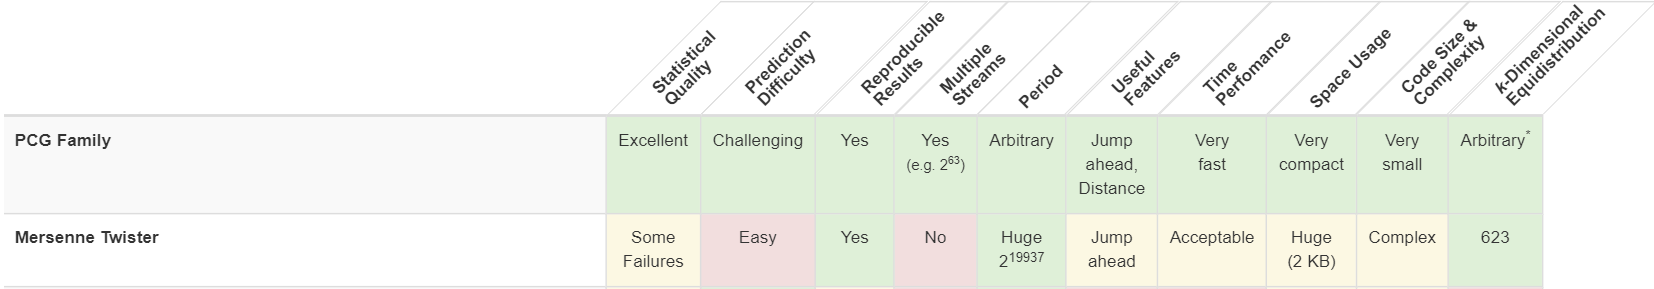</center>

<br>
<br>

Call *default_rng* to get a new instance of a Generator, then call its methods to obtain samples from different distributions. [12] Some of the methods are described further in this notebook.

In [4]:
# Generating a seed
rng = np.random.default_rng()
print (rng)

Generator(PCG64)


### 2.2. SIMPLE RANDOM DATA <a id='SIMPLE_RANDOM_DATA'></a>

There are four methods to generate simple random data in current Numpy version: *integers*, *random*, *choice* and *byte*. Each is described below.
***

#### 2.2.1. [**integers**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers) (low, high=None, size=None, dtype=np.int64, endpoint=False) <a id='integers'></a>

Returns random integers in the specified range. ***low*** refers to the start of the range and it's inclusive. ***high*** is the end of the range and is by the default exclusive (end of range = *high* - 1). To inlcude *high* in the range, ***endpoint***, which is *False* by default, has to be set up as *True*. If *high* is not specified then *low* is used as the end of the range. ***size*** defines the shape of the output and it can be one or multi-dimensional. ***dtype*** defines the dtype of the output, and it is *np.int64* by default. *Integers* returns radnom integers in "discrete uniform" distribution. A discrete uniform distribution is a statistical distribution where the probability of outcomes is equally likely and with finite values. [16]

##### EXAMPLES:
***

UNIFORM DISTRIBUTION OF RANDOM INTEGERS 10 - 1000000 (exclusive)

Integers: [30 42 52 ... 60 57 99] 



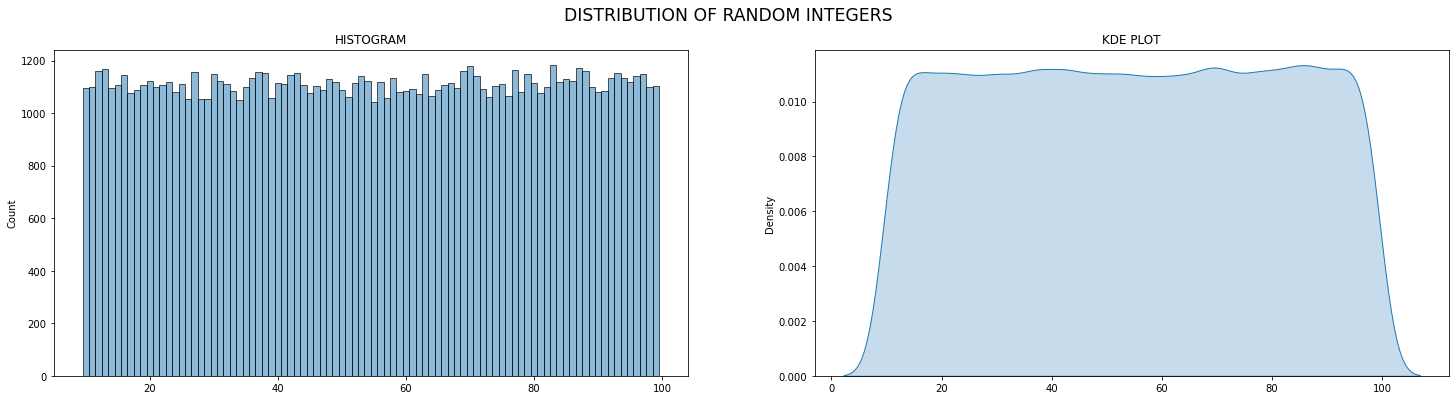

In [5]:
# Generate random integers
x = (rng.integers(10, 100, size=100000))
print ("Integers:", x, "\n")

#Plotting
fig, axs = plt.subplots(1, 2, figsize = (25,6))
fig.suptitle ("DISTRIBUTION OF RANDOM INTEGERS", size = "xx-large")
sns.histplot (x, discrete = True, alpha = 0.5, ax = axs[0]).set_title("HISTOGRAM")
sns.kdeplot(x, shade=True, ax = axs[1]).set_title("KDE PLOT")
plt.show()

| |
| :-: | 
| It is visible in both histogram and KDE plot that *integer* function returns random integers in uniform distribution. |                                                                                     

***

RANDOM INTEGERS 0 - 5 (inclusive and exclusive)

 Integers (0-5]: [2 2 4 1 1 2 2 3 4 1 3 0 2 0 0 4 3 0 4 0 1 3 2 1 1 3 1 0 0 0 4 1 0 3 4 2 3
 2 1 2 4 1 0 0 4 2 3 3 2 1 1 2 0 3 1 0 3 4 3 2 3 4 3 1 0 3 4 0 4 3 4 1 2 1
 1 3 0 1 0 1 0 2 1 2 3 0 1 2 1 4 0 3 0 4 4 1 2 2 0 3] 

 Integers (0,5): [3 1 3 2 2 4 0 1 3 0 1 4 3 5 0 2 0 5 0 2 3 5 4 2 0 5 4 3 5 4 5 4 0 1 2 0 1
 1 4 5 2 2 0 0 3 3 1 1 0 2 2 4 0 3 4 2 3 3 3 2 0 3 3 4 0 1 0 5 4 5 5 2 3 1
 3 0 1 5 4 3 4 2 1 1 5 2 3 2 4 1 2 3 0 0 0 5 0 5 5 5]


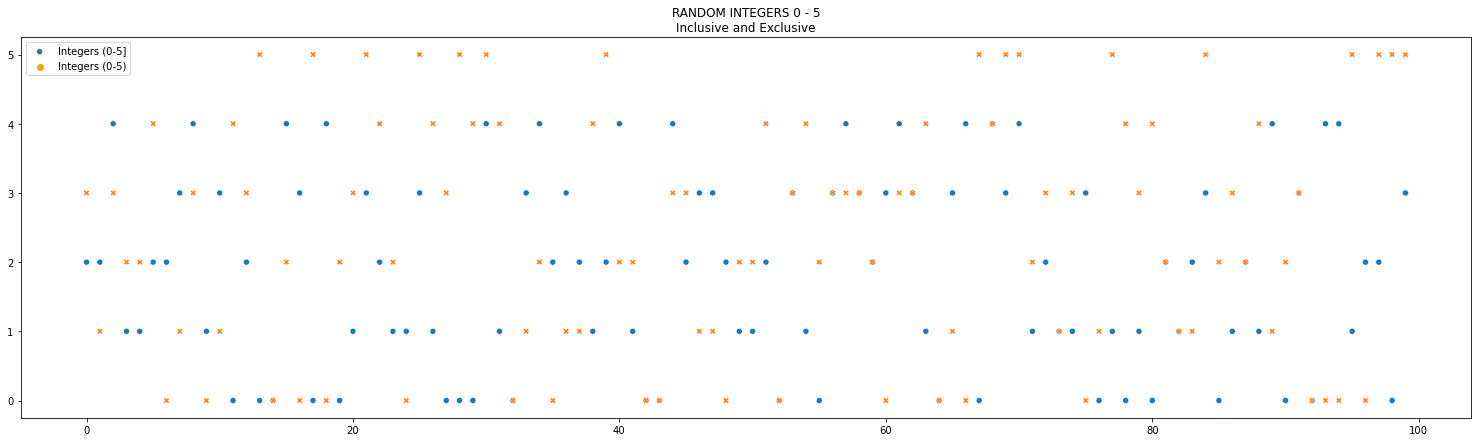

In [6]:
# Genarating random integers
x = (rng.integers(5, size=100))
x1 = (rng.integers(5, size=100, endpoint = True))
print (" Integers (0-5]:", x,"\n\n", "Integers (0,5):", x1)

# Plotting
fig, axs = plt.subplots(figsize = (26, 7))
sns.scatterplot (data = [x, x1]).set_title ("RANDOM INTEGERS 0 - 5\nInclusive and Exclusive")
# Customize legend
plt.legend(["Integers (0-5]", "Integers (0-5)"])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[1].set_color('orange')
plt.show()

|  |
| :-: | 
| This scatterplot gives a visual represantation of the random integers, both with inclusive and exclusive endpoints. Both random lists have the same *low* value, but *endpoint* is set to *True* on one. It is clearly visible that the one with the *endpoint = True* is the one with orange markers. | 

***

RANDOM INTEGERS 0 - 10 (exclusive) - 2D ARRAY

2D Array:
 [[7 3 3 0 3 0 9 6 3 6 7 2 9 5 8 2 5 2 1 1 3 0 9 4 3 4 2 9 9 1]
 [8 8 0 0 7 2 4 6 6 5 2 5 4 7 5 7 3 0 2 1 5 3 4 5 0 4 9 6 9 5]
 [8 5 4 5 7 7 1 1 1 0 3 3 4 3 6 8 3 5 1 4 7 5 8 8 9 2 0 5 2 5]
 [3 4 4 8 3 2 3 1 6 3 7 2 0 2 7 8 9 7 8 3 5 8 6 8 9 0 5 8 6 6]
 [0 9 8 4 5 7 1 2 4 8 7 7 9 7 9 1 9 4 2 2 5 9 4 5 5 4 4 8 6 6]
 [2 3 0 1 4 6 0 3 5 0 8 7 1 5 0 0 1 3 1 1 2 5 2 2 4 2 9 8 1 6]
 [7 9 7 9 5 9 1 4 3 0 9 0 4 3 1 4 3 0 3 9 7 3 3 4 4 9 3 0 2 2]
 [8 8 1 3 7 7 3 1 1 8 1 6 9 3 4 5 3 0 3 0 0 0 9 3 8 8 9 7 7 9]
 [9 3 6 2 2 6 6 9 3 7 4 2 4 3 5 4 4 7 2 1 8 6 8 6 2 1 5 6 4 1]
 [1 7 9 1 4 3 8 2 2 9 5 0 3 9 9 9 1 6 0 8 5 0 3 3 4 4 8 3 5 8]] 



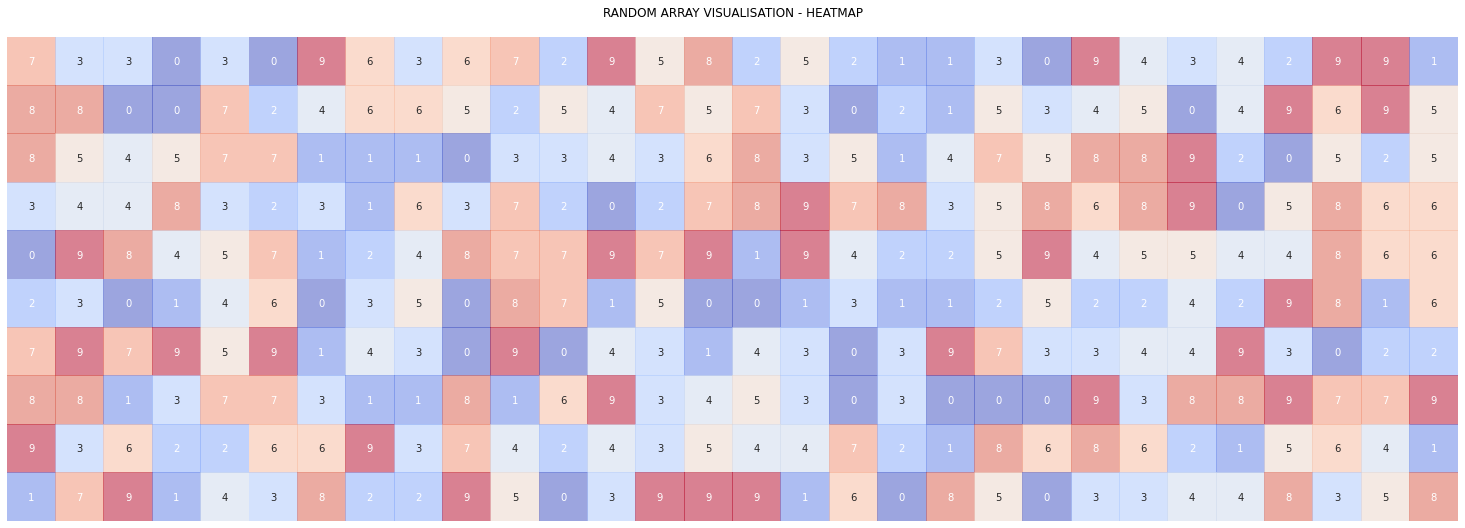

In [7]:
# Generate random integers
x = (rng.integers(10, size=(10, 30)))
print ("2D Array:\n", x, "\n")

# Plotting
fig, axs = plt.subplots(figsize = (26,10))
sns.heatmap (data = x, square = True, annot = True, cmap = "coolwarm", alpha = 0.5, cbar=False).set_title("RANDOM ARRAY VISUALISATION - HEATMAP\n")
# Removing plot ticks
plt.xticks([])
plt.yticks([])
plt.show()

|  |
| :-: | 
| This heatmap serves as a visual represantation of a 2D random array (10 x 30). If code gets run multiple times, it is clearly visible how the colored blocks change their place. | 

***

ARRAY WITH THREE DIFFERENT *high* VALUES

In [8]:
# Generating random integers
x = (rng.integers(1, [10, 50, 100]))
print (x)

[ 7 30  3]


***

ARRAY WITH THREE DIFFERENT *low* VALUES

In [9]:
# Generating random integers
x = (rng.integers([1, 50, 90], 100))
print (x)

[ 9 78 94]


***

RANDOM INTEGERS 0 - 10 (exclusive) - 3D ARRAY

3D Array:
x =
 [[3 8 9 4 6]
 [0 4 8 5 7]
 [8 8 8 7 2]
 [2 8 7 7 9]
 [9 7 4 2 6]]
y =
 [[2 2 9 1 0]
 [6 6 4 6 3]
 [5 3 7 5 8]
 [9 5 3 7 6]
 [4 2 2 0 5]]
z =
 [[7 2 7 7 6]
 [7 2 9 4 6]
 [9 5 6 0 6]
 [2 2 5 8 6]
 [7 1 7 5 6]]


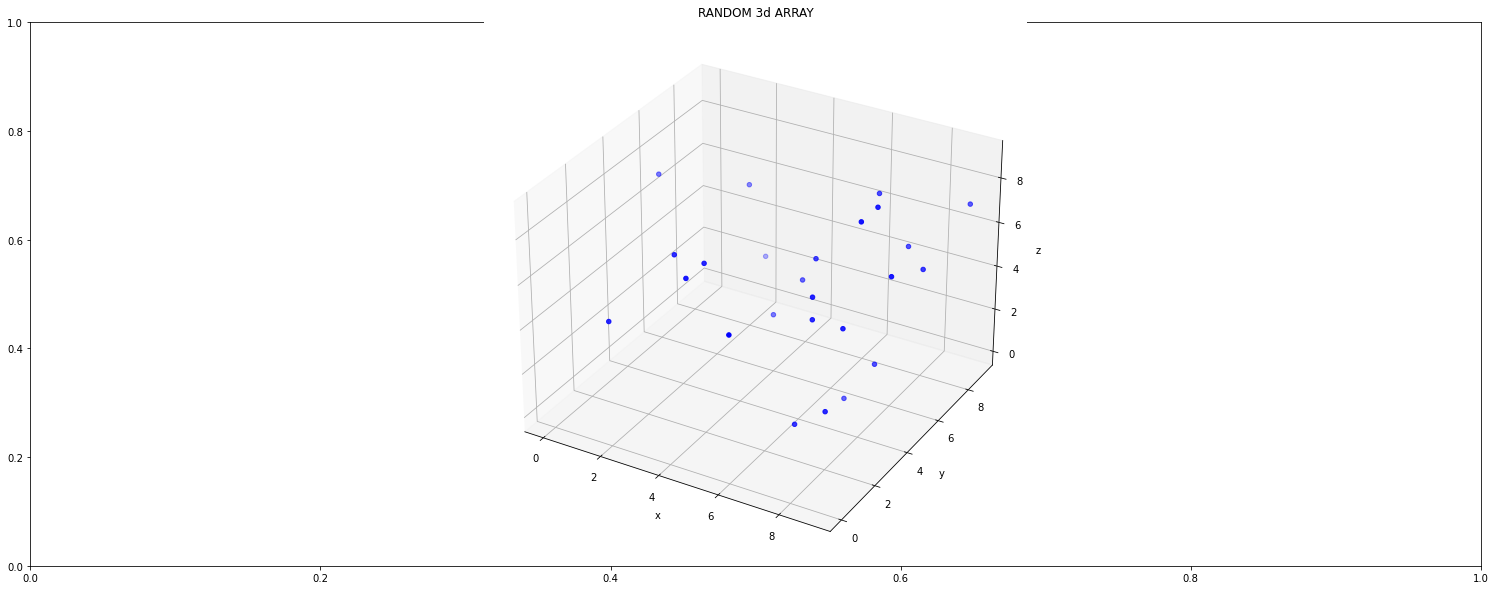

In [10]:
# Generating random integers
x, y, z = (rng.integers(10, size=(3,5,5)))
print ("3D Array:")
print ("x =\n", x)
print ("y =\n", y)
print ("z =\n", z)

# Plotting
fig, axs = plt.subplots(figsize = (26,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("RANDOM 3d ARRAY")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter (x, y, z, c= 'blue')
plt.show()

|  |
| :-: | 
| This 3D plot shows randomly generated integers in 3D space. x, y and z axis are generated randomly using *integer* function. If code gets run multiple times, we can see how markers move in the 3D space. | 

***

#### 2.2.2. [**random**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)(size=None, dtype=np.float64, out=None) <a id='random'></a>

Returns random floats in the interval higher or equal to 0.0 and less then 1.0. This interval is called half-open interval, where one of the endpoints are inclusive. ***size*** defines the output shape, which, if not specified, is none - single value is returned. ***dtype*** defines the dtype of the output and is *np.float64* by the default. Only *float64* and *float32* are supported. ***out*** is alternative output array in which to place the result. *return* module can also be used for custom half-open intervals, e.g. if we want the output of a radnom float between a and b, we can do the following:
> (b - a) * random() + a

The outputs are from the “continuous uniform” distribution. A continuous uniform distribution (also referred to as rectangular distribution) is a statistical distribution with an infinite number of equally likely measurable values. [16]

EXAMPLES:
***

In [11]:
# Genarating random float
x = rng.random()
print (x)

0.7066240615400834


***

UNIFORM DISTRIBUTION OF RANDOM FLOATS IN HALF OPEN INTERVAL [0,10)

Floats: [0.98235214 0.01269302 0.23030349 ... 0.90368277 0.06544608 0.40473476] 



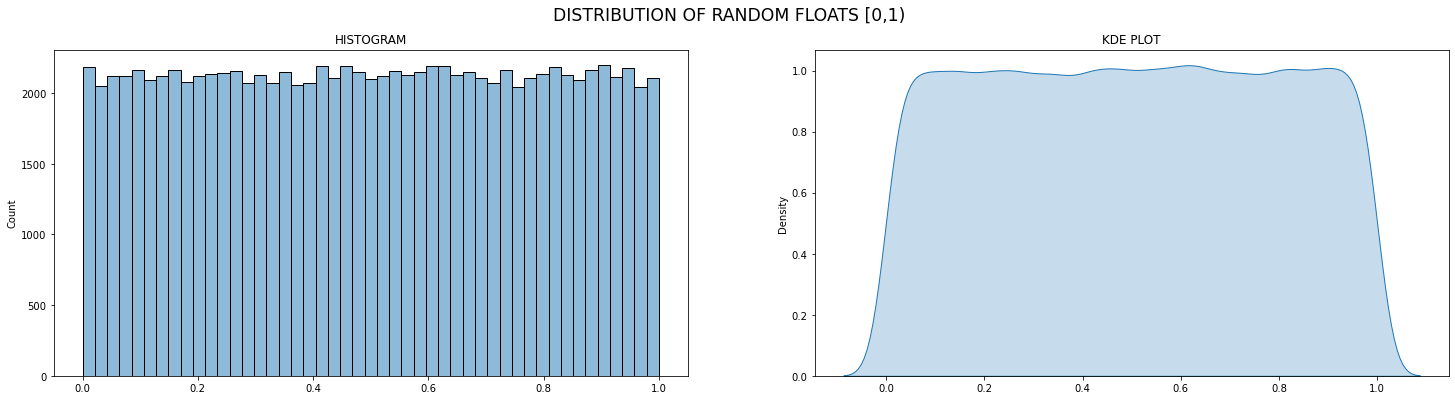

In [12]:
# Generating random float
x = (rng.random (100000))
print ("Floats:", x, "\n")

# Plotting
fig, axs = plt.subplots(1, 2, figsize = (25,6))
fig.suptitle ("DISTRIBUTION OF RANDOM FLOATS [0,1)\n", size = "xx-large")
sns.histplot (x, alpha = 0.5, ax = axs[0]).set_title("HISTOGRAM")
sns.kdeplot(x, shade=True, ax = axs[1]).set_title("KDE PLOT")
plt.show()

|  |
| :-: | 
| Both histogram and KDE plot shows that *random* function returns random floats in uniform distribution. The higher the *size* value, the mentioned is clearer.|                                                                                     

***

RANDOM FLOATS (0, 1]

2D Array [0-1):
 [[0.36374577 0.11601046 0.81015769 0.22369917 0.91130293]
 [0.7830548  0.29661063 0.41359917 0.92452139 0.71468564]
 [0.82657296 0.26202011 0.04737665 0.17527545 0.80787411]
 [0.85922731 0.03953159 0.19604423 0.69480001 0.48933571]
 [0.0321382  0.12561904 0.43249419 0.01300781 0.34922825]] 

2D Array [50-100)):
 [[90.24571691 98.56765981 51.17023825 62.69590603 57.51598045]
 [94.03964338 51.80704335 88.95946862 52.67910819 99.01871743]
 [84.76794765 85.90537653 86.96044237 68.59819418 76.30944172]
 [57.65960722 73.77119082 94.05381895 75.00854272 60.07798828]
 [54.6369273  73.32059589 53.18541934 66.28905931 75.27658976]] 



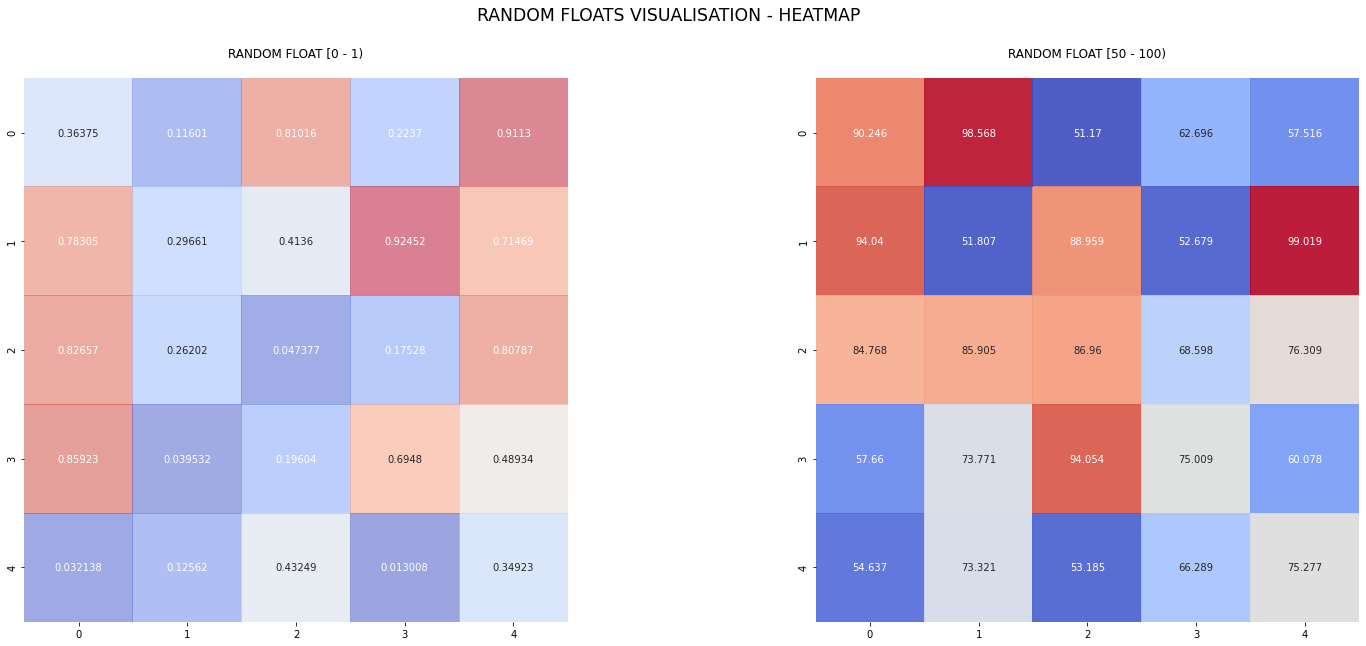

In [13]:
# Generate random integers
x = rng.random([5, 5])
print("2D Array [0-1):\n", x, "\n")
x1 = ((100-50) * rng.random((5, 5)) + 50)
print("2D Array [50-100)):\n", x1, "\n")

# Plotting
fig, axs = plt.subplots(1, 2, figsize = (26,10))
fig.suptitle ("RANDOM FLOATS VISUALISATION - HEATMAP", size = "xx-large")
sns.heatmap (data = x, square = True, annot = True, fmt='.5g', cmap = "coolwarm",
             alpha = 0.5, ax = axs[0], cbar=False).set_title("RANDOM FLOAT [0 - 1)\n")
sns.heatmap (data = x1, square = True, annot = True, fmt='.5g', cmap = "coolwarm",
             alpha = 0.9, ax = axs[1], cbar=False).set_title("RANDOM FLOAT [50 - 100)\n")

plt.show()

|  |
| :-: | 
| The heatmaps give a visual represantation of two 2D random arrays (5x5). One heatmap doesn't have the range specified and the return are the floats in range [0 - 1). The second heatmap has a specified range, using formula: (b - a) * random() + a. If code is run multiple times, the square representing numbers will change the color and place.| 

***

#### 2.2.3. [**choice**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice) (a, size=None, replace=True, p=None, axis=0, shuffle=True) <a id='choice'></a>

Generates a random sample from a given array. ***a*** sets the range from which the radnom sample gets generated. If *a* is an ndarray, the output is random selection of the elements of that array. If *a* is an integer, the output is random selection of a range from 0 - given integer (exclusive). ***size*** defines the shape of the output. It is *None* by default. If *a* has more than one dimension, the size shape will be inserted into the axis dimension. ***replace*** defines if the return will have repeated elements. It is *True* by default, meaning that a value of *a* can be selected multiple times. ***p*** is the probability of the entries in *a* to be selected. By default it is *None*, meaning the probibility is equal for all - uniform distribution. ***axis*** is axis along which the selection is performed, and is *0* by default. ***shuffle*** defines if the output is shuffled when sampling without replacement. Default is *True*.

<br>

Image 1. Axes
<center><img src="https://i.stack.imgur.com/dcoE3.jpg" width="500"/></center>

EXAMPLES:
***

INTEGER CHOSEN IN RANGE [0 - 100)

In [14]:
# Radnom choice
x = rng.choice (100)
print (x)

49


***

UNIFORM DISTRIBUTION OF RANDOM INTEGERS CHOSEN IN RANGE [0 - 50)

Integers: [ 4 26  7 ... 14 48 10] 



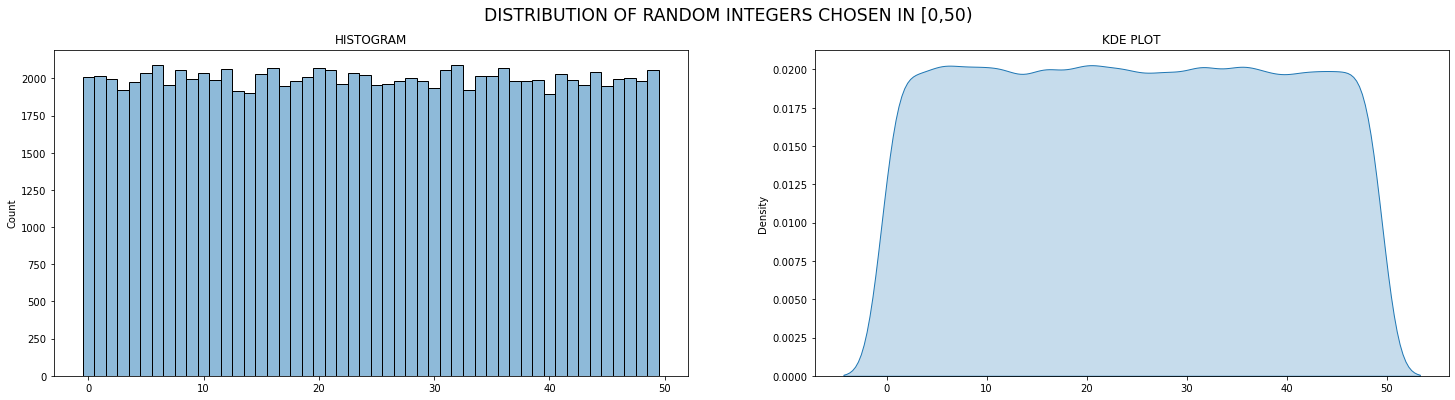

In [15]:
# Random choice
x = (rng.choice(50,100000))
print ("Integers:", x, "\n")

# Plotting
fig, axs = plt.subplots(1, 2, figsize = (25,6))
fig.suptitle ("DISTRIBUTION OF RANDOM INTEGERS CHOSEN IN [0,50)\n", size = "xx-large")
sns.histplot (x, discrete = True, alpha = 0.5, ax = axs[0]).set_title("HISTOGRAM")
sns.kdeplot(x, shade=True, ax = axs[1]).set_title("KDE PLOT")
plt.show()

|  |
| :-: | 
| Histogram and KDE plot shows that *choice* function returns randomly chosen elements from a given array in uniform distribution. This means that the probibility that any of the given elements will be chosen is equal. |                                                                                   

***

DISTRIBUTION OF RANDOM CHOSEN INTEGERS [1,3,5,7] WITH SET PROBABILITY

Integers: [3 7 5 ... 5 3 5] 



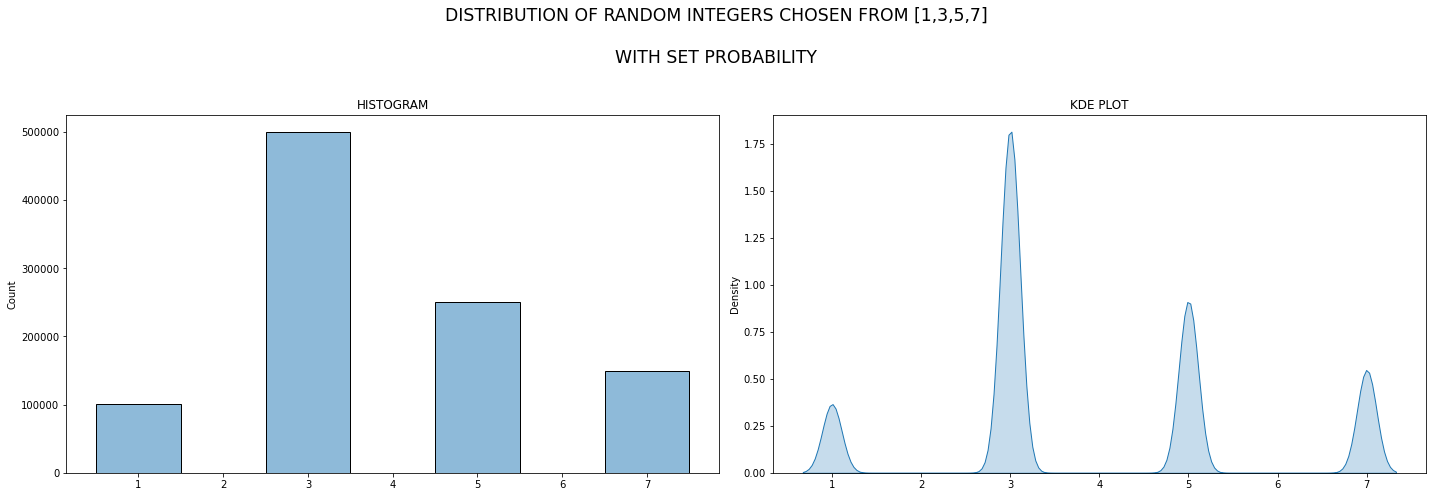

In [16]:
# Random choice
x = (rng.choice([1,3,5,7], 1000000, p=[0.1, 0.5, 0.25, 0.15]))
print ("Integers:", x, "\n")

# Plotting
fig, axs = plt.subplots(1, 2, figsize = (20,7))
fig.suptitle ("DISTRIBUTION OF RANDOM INTEGERS CHOSEN FROM [1,3,5,7]\n\nWITH SET PROBABILITY\n", size = "xx-large")
sns.histplot (x, discrete = True, alpha = 0.5, ax = axs[0]).set_title("HISTOGRAM")
sns.kdeplot(x, shade=True, ax = axs[1]).set_title("KDE PLOT")
plt.tight_layout()
plt.show()

| |
| :-: | 
| The above histogram and KDE plot shows that the probibility in the *choice* function can be altered. By setting *p* we can give certain elements higher chance to be chosen. It is clearly visible how in this case number 3 has the highest probability 0.5, followed by number 5 with probibility 0.25, followed by number 7 with probibility 0.15 and finally number 1 which has the smallest probibility 0.1. |                                                                                   

***

DISTRIBUTION OF RANDOM CHOSEN INTEGERS [0-10) WITH SET PROBABILITY

Integers: [4 7 3 3 9 1 4 0 2 2] 

Integers: [1 7 4 0 3 5 9 6 2 8] 



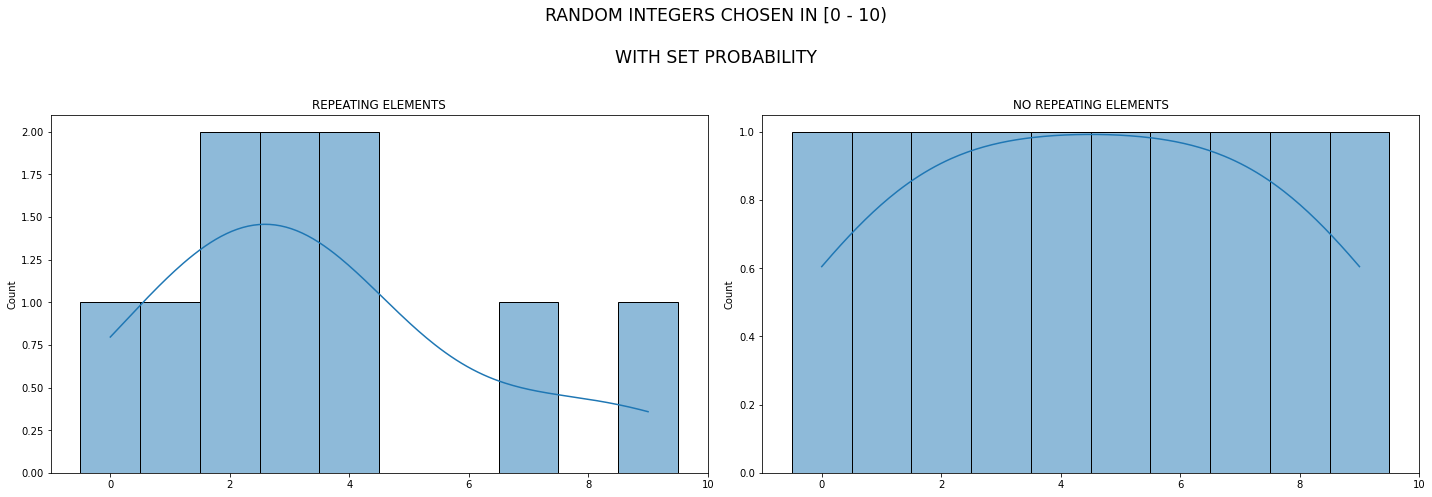

In [17]:
# Random choices
x = (rng.choice(10, 10))
print("Integers:", x, "\n")
x1 = (rng.choice(10,10, replace=False))
print("Integers:", x1, "\n")

# Plotting
fig, axs = plt.subplots(1, 2, figsize = (20,7))
fig.suptitle ("RANDOM INTEGERS CHOSEN IN [0 - 10)\n\nWITH SET PROBABILITY\n", size = "xx-large")
sns.histplot (x, discrete = True, alpha = 0.5, ax = axs[0], kde = True).set_title("REPEATING ELEMENTS")
sns.histplot (x1, discrete = True, alpha = 0.5, ax = axs[1], kde = True).set_title("NO REPEATING ELEMENTS")
plt.tight_layout()
plt.show()

| |
| :-: | 
| The two histograms and KDE plots show the result of setting *repeat* to *False*. Left plot represents the default setting, where *repeat* is *True*. It is visible how certain bars are higher and other lower (non existing), showing how some numbers get repeted or don't get returned at all. The plot on the right has *repeat* set to *False* and there are no repeating elements. They are all returned and returned once only. |                                                                                   

***

2D Array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

2D Array - shuffled:
 [[15  5 10 19  2]
 [ 4  1 13  9  0]
 [22 20 21  3 12]
 [23 14 16  7 17]
 [11 24  8  6 18]] 



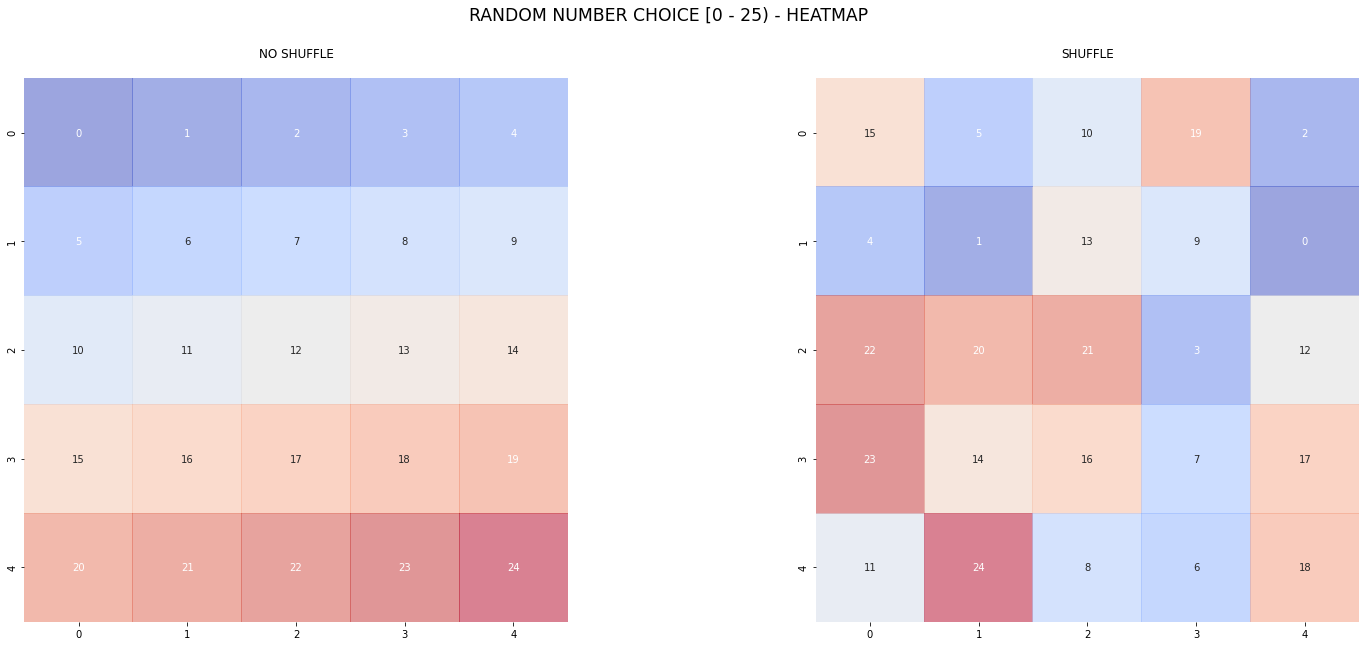

In [18]:
# Random choices
x = (rng.choice (25,(5,5), replace = False, shuffle = False))
print("2D Array:\n", x, "\n")
x1 = (rng.choice (25,(5,5), replace = False, shuffle = True))
print("2D Array - shuffled:\n", x1, "\n")

# Plotting
fig, axs = plt.subplots(1, 2, figsize = (26,10))
fig.suptitle ("RANDOM NUMBER CHOICE [0 - 25) - HEATMAP", size = "xx-large")
sns.heatmap (data = x, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[0], cbar=False).set_title("NO SHUFFLE\n")
sns.heatmap (data = x1, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[1], cbar=False).set_title("SHUFFLE\n")
plt.show()

| |
| :-: | 
| *choice* function allows for return to be shuffled when sampling without replacement. It is represented on the heatmaps above. The left heatmap represents 25 chosen elements from an array in a range [0-25). Right heatmap represents that array being shuffled, when *shuffle* is set to *True*. 

***

Integers 0: [0 1 2 3 4 5 6 7 8 9] 

Integers 1: [5 0 1 6 4 9 7 2 3 8] 

Integers 2: [0 7 1 2 3 8 1 5 7 9 0 6 3 9 9] 

Integers 3: [0 6 4 7 7 5 6 7 4 3 7 0 8 8 9] 



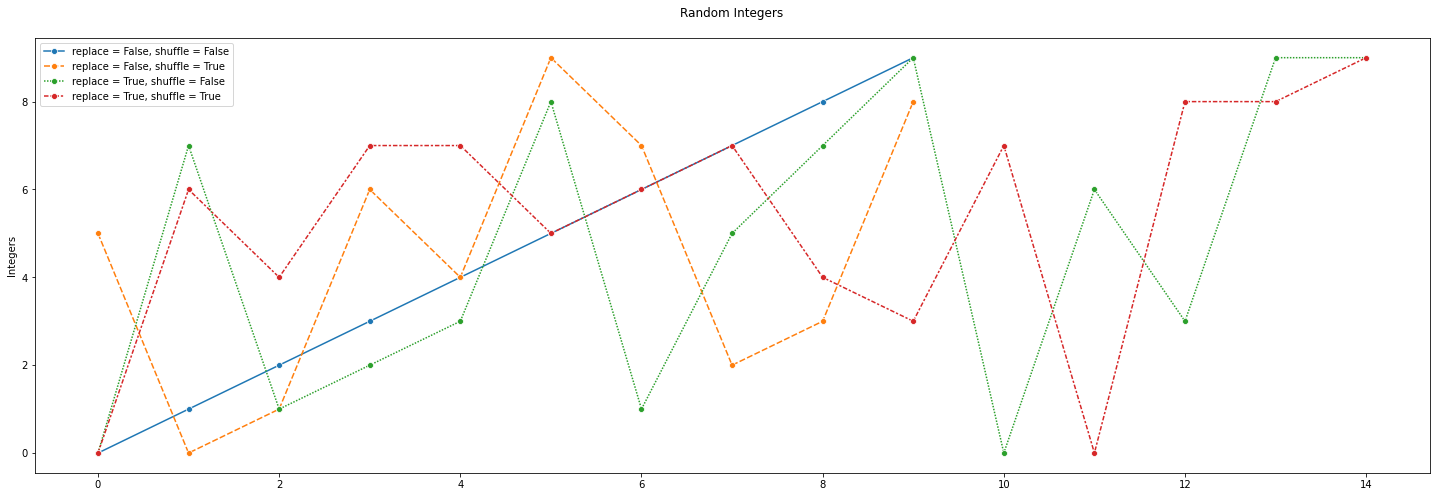

In [19]:
# Random choices
x = (rng.choice (10,10, replace = False, shuffle = False))
print("Integers 0:", x, "\n")
x1 = (rng.choice (10,10, replace = False))
print("Integers 1:", x1, "\n")
x2 = (rng.choice (10,15, shuffle = False))
print("Integers 2:", x2, "\n")
x3 = (rng.choice (10,15))
print("Integers 3:", x3, "\n")

# Plotting
fig, axs = plt.subplots(figsize = (25,8))
sns.lineplot (data = [x, x1, x2, x3], marker = "o")
plt.title ("Random Integers\n")
plt.ylabel("Integers")
plt.legend(["replace = False, shuffle = False","replace = False, shuffle = True",
           "replace = True, shuffle = False","replace = True, shuffle = True"])
plt.show()

|  |
| :-: | 
| This lineplot show 4 different combinations with *replace* and *shuffle* being either set to *True* or *False*. Integers 0 are the integers chosen with no repeating elements and without being shuffled. Integers 1 also has no repeating elements but is shuffled. Integers 2 has repeating elements and is not shuffled and finally Integers 3 has both repeating elements and they are being shuffled. |                                                                                  

***

UNIFORM RANDOM SAMPLE FROM AN ARRAY

In [20]:
# Random choice
x = rng.choice([[0, 1, 2], [3, 4, 5], [6, 7, 8]], 4, replace=True)
print (x)

[[3 4 5]
 [3 4 5]
 [6 7 8]
 [0 1 2]]


***

Original array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

Array - row:
 [[20 21 22 23 24]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [ 0  1  2  3  4]] 

Array - column:
 [[ 3  2  4  0  1]
 [ 8  7  9  5  6]
 [13 12 14 10 11]
 [18 17 19 15 16]
 [23 22 24 20 21]]


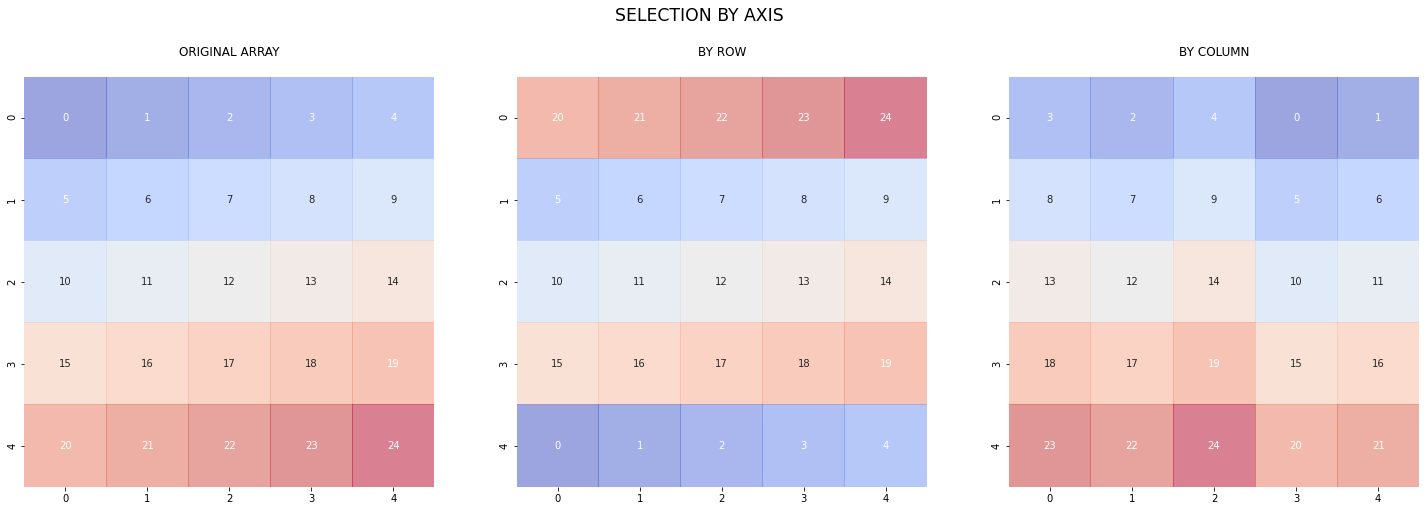

In [21]:
# Generating an array
arr = np.arange(25).reshape(5,5)
print("Original array:\n", arr, "\n")
# Random choices from an array
x = (rng.choice (arr, 5, axis = 0, replace = False))
print("Array - row:\n", x, "\n")
x1 = (rng.choice (arr, 5, axis = 1, replace = False))
print("Array - column:\n", x1)

# Plotting
fig, axs = plt.subplots(1, 3, figsize = (25,8))
fig.suptitle ("SELECTION BY AXIS", size = "xx-large")
sns.heatmap (data = arr, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[0], cbar=False).set_title("ORIGINAL ARRAY\n")
sns.heatmap (data = x, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[1], cbar=False).set_title("BY ROW\n")
sns.heatmap (data = x1, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[2], cbar=False).set_title("BY COLUMN\n")
plt.show()

|  |
| :-: | 
| The heatmaps above show the selection by different axes in a 2D array. First heatmap shows the array from which the selection is performed. Second heatmap shows the selection by row, where *axis* is *0* (default). The last heatmap shows the selection by column and the *axis* is set to *1*. |                                                                                  

***

RANDOM SAMPLE FROM A NON-INTEGER ELEMENTS

In [22]:
# Generate a list
colors = ['red', 'blue', 'yellow', 'black']
# Random choice from a list
x = rng.choice(colors, 10, p=[0.5, 0.1, 0.1, 0.3])
print (x)

['black' 'red' 'red' 'red' 'red' 'red' 'red' 'black' 'red' 'red']


***

#### 2.2.4. [**bytes**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes) (length) <a id='bytes'></a>

Genarates random bytes. The number of bytes is defined by ***length***.

EXAMPLES:
***

In [23]:
# Generate radnom byte
x = rng.bytes(1)
print (x)

b'\x9e'


***

In [24]:
# Generate random bytes
x = rng.bytes(20)
print (x)

b'C\xc6\x90\x81\x86ZsX\x03\x81d\x9f\xaa\\\xc9\xbaU\xfa+\x9d'


***

### 2.3. PERMUTATIONS <a id='PERMUTATIONS'></a>

There are three permutation functions used in the current NumPy version: *shuffle*, *permutation* and *permuted*. Where very similar, there are still some differences between the mentioned function. The main difference between *shuffle* and *permutation* is that *shuffle* operates in-place, while *permutation* returns a copy. *permuted* can do either of those two. The other difference is that both *shuffle* and *permutation* treat the input as a one-dimensional sequence, and the axis parameter determines which dimension of the input array to use as the sequence. With *permuted*, each slice along the given axis is shuffled independently of the others. The following table summarizes the behaviors of the methods. [17]

| Method | Copy / In-Place | Axis handling |
| :- | :-: | :-: |
| Shuffle | in-place | as if 1D |
| Permutation | copy | as if 1D |
| Permuted | either | axis independent |

***

#### 2.3.1. [**shuffle**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle) (x, axis=0) <a id='shuffle'></a>

Modifies an array or sequence in-place by shuffling its contents. This method changes the original list, it does not return a new list. The order of sub-arrays is changed but their contents remains the same. A subarray is a contiguous part of array, an array that is inside another array. [18] ***x*** defines the element to be shuffled. ***axis*** defines the axis which *x* is shuffled along. It is *0* by default.

EXAMPLES:
***

ARRAY [0, 100) SHUFFLE - IN PLACE

Array:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 

Shuffled array:
 [85 59 63 64 95 32 49 29 86  3 23 17 47 74 51 15 38 43 27  5  8 10 87 50
 77 45 36 81  9  0 93 26 91 58 69 31 21 67 19 79 24 90 20 76 98 61  7 57
 44 30  6 92 52 46 68 33 53 66 14 48 13 11 22 70 34 65 56 80 96  4 25 18
 71  1 54 72 82 78 99 94 88 16 84 37 41 39 73 42 40 60 75 89 35  2 97 62
 28 55 12 83] 



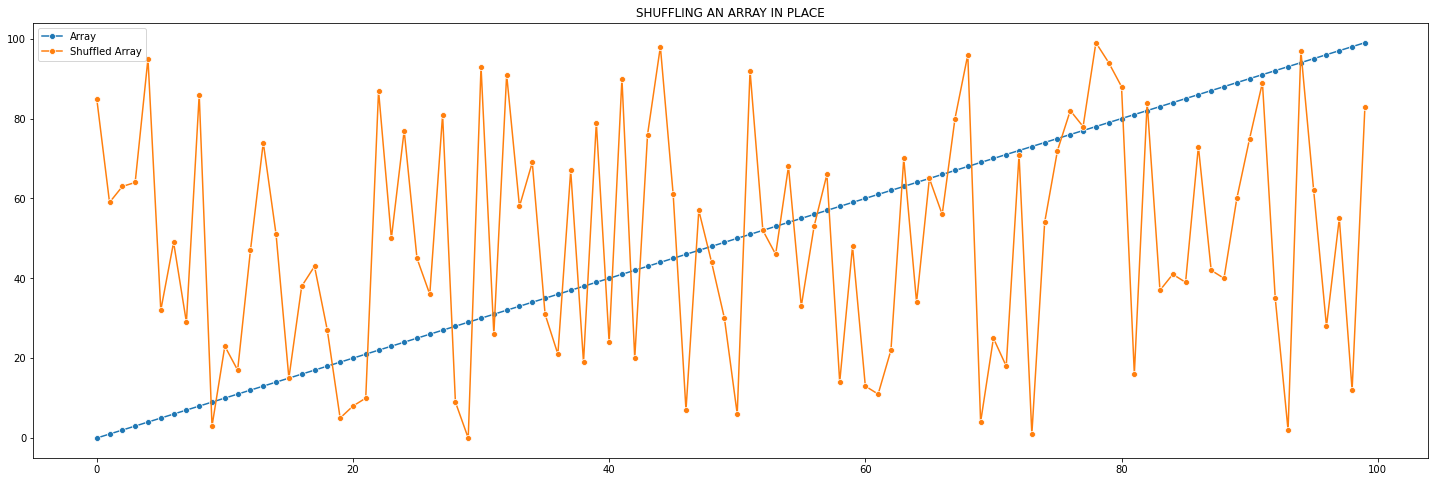

In [25]:
# Generate an array
x = np.arange(100)
print ("Array:\n", x, "\n")
# Plotting
fig, axs = plt.subplots(figsize = (25,8))
sns.lineplot(data = x, marker = "o")

# Shuffling an array
rng.shuffle(x)
print ("Shuffled array:\n", x, "\n")
# Plotting
sns.lineplot(data = x, marker = "o")
plt.title ("SHUFFLING AN ARRAY IN PLACE")
plt.legend(["Array","Shuffled Array"])
plt.show()

|  |
| :-: | 
| This plot gives a visual represantation how *shuffle* function shuffles an array in place. The blue line is the array before it gets shuffled, and the orange one after it is shuffled. |                                                                                  

ARRAY [0, 20) SHUFFLE - IN PLACE

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 5 18  8  7  3 11 19  0  4  9 13 10 17 12 14 15 16  1  2  6]


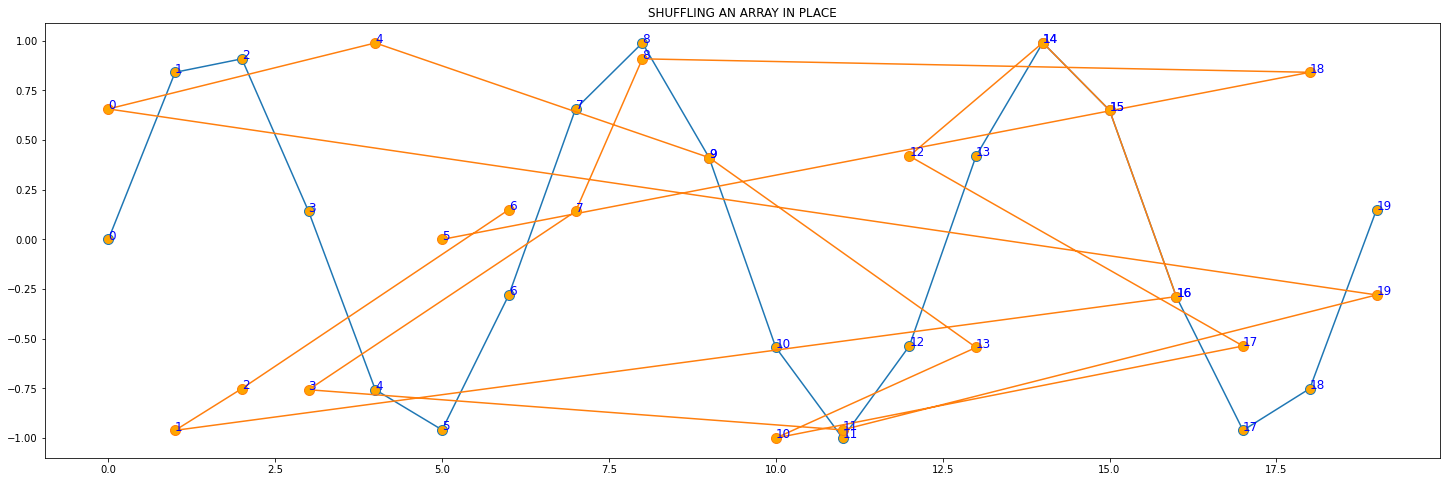

In [26]:
# Generate arrays
x = np.arange(20)
y = np.sin(x)
print (x)

# Plotting
fig, axs = plt.subplots(figsize = (25,8))
plt.title ("SHUFFLING AN ARRAY IN PLACE")
plt.plot(x, y, marker="o", markerfacecolor='orange', markersize=10)
for a, b in zip(x, y):
    plt.text(a, b, str(a), color="b", fontsize=12)

# Shuffling array x
rng.shuffle(x)
print (x)
# Plotting
plt.plot(x, y, marker="o", markerfacecolor='orange', markersize=10)
# Adding marker values
for a, b in zip(x, y):
    plt.text(a, b, str(a), color="b", fontsize=12)
plt.show()

|  |
| :-: | 
| Same as the previous plot, this one also gives a visual represantation how *shuffle* function shuffles an array in place. The blue line is the array before it gets shuffled, and the orange one after it is shuffled. The line gets drawn starting from the first number in the array. It is visible how the blue line follows the sinus curve, but it gets randomly drawn after being shuffled. |                                                                                  

***

2D ARRAY SHUFFLE

Initial Array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

Axis 0 shuffle:
 [[20 21 22 23 24]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [ 0  1  2  3  4]
 [15 16 17 18 19]] 

Axis 1 shuffle:
 [[23 21 22 20 24]
 [ 8  6  7  5  9]
 [13 11 12 10 14]
 [ 3  1  2  0  4]
 [18 16 17 15 19]] 



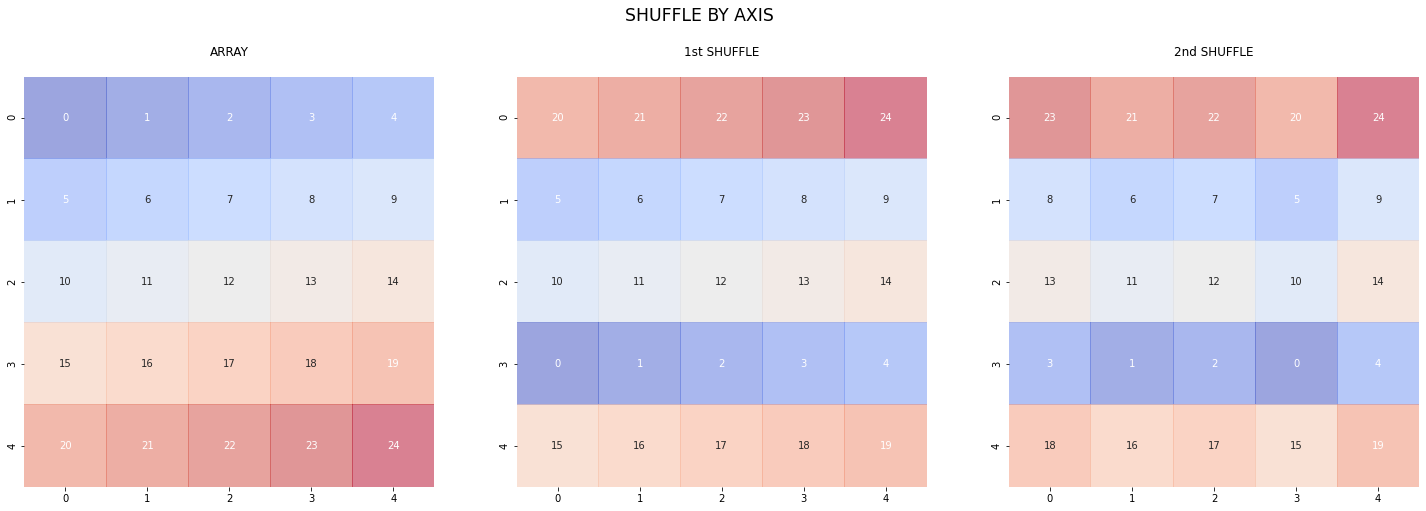

In [27]:
# Generating an array
x = np.arange(25).reshape((5, 5))
print("Initial Array:\n", x, "\n")
# Plotting
fig, axs = plt.subplots(1, 3, figsize = (25,8))
fig.suptitle ("SHUFFLE BY AXIS", size = "xx-large")
sns.heatmap (data = x, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[0], cbar=False).set_title("ARRAY\n")

# Shuffling an array by row
rng.shuffle(x, axis = 0)
print("Axis 0 shuffle:\n", x, "\n")
# Plotting
sns.heatmap (data = x, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[1], cbar=False).set_title("1st SHUFFLE\n")

# Shuffling an array by column
rng.shuffle(x, axis = 1)
print("Axis 1 shuffle:\n", x, "\n")
# Plotting
sns.heatmap (data = x, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[2], cbar=False).set_title("2nd SHUFFLE\n")
plt.show()

| |
| :-: | 
| The heatmaps above show the shuffle of an array by axes. It is visible how *shuffle* function shuffles the contents of an array "in bulk". First plot shows the inital array, which then gets shuffled first by axis 0 (row) and then by axis 1 (column).  |                                                                                  

***

#### 2.3.2. [**permutation**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation) (x, axis=0) <a id='permutation'></a>

Randomly permutes a sequence, or returns a permuted range. ***x*** defines the element to be permuted. If it is an integer, randomly permute *np.arange(x)*. If *x* is an array, makes a copy and shuffles the elements randomly. ***x*** is he axis which x is shuffled along and it is *0* by default.

EXAMPLES:
***

PERMUTATION OF AN ARRAY [1, 4, 9, 12, 15]

In [28]:
# Shuffling a list
x = (rng.permutation([1, 4, 9, 12, 15]))
print(x)

[12  1 15  9  4]


***

PERMUTATION OF AN ARRAY [0, 100)

Array - before shuffle:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 

Array - shuffled (copy):
 [68 20 26 21 71 57 34 51 88 45 17 73 67 18 75 12 74 35 61 82 56  3 85 95
 65 55 70 19 47 30 14 24 58 90 40 98 77 36 96 76  5 15 87 62  9 39  8 22
 63 97 32 23 48 72 84 13 93  2 25  7 52 37 53 11 31  6  0  4 81 79 43 44
 64 94 49  1 28 27 42 59 16 38 99 46 69 50 89 91 78 86 33 54 80 60 83 41
 92 66 10 29] 

Array - after shuffle:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 



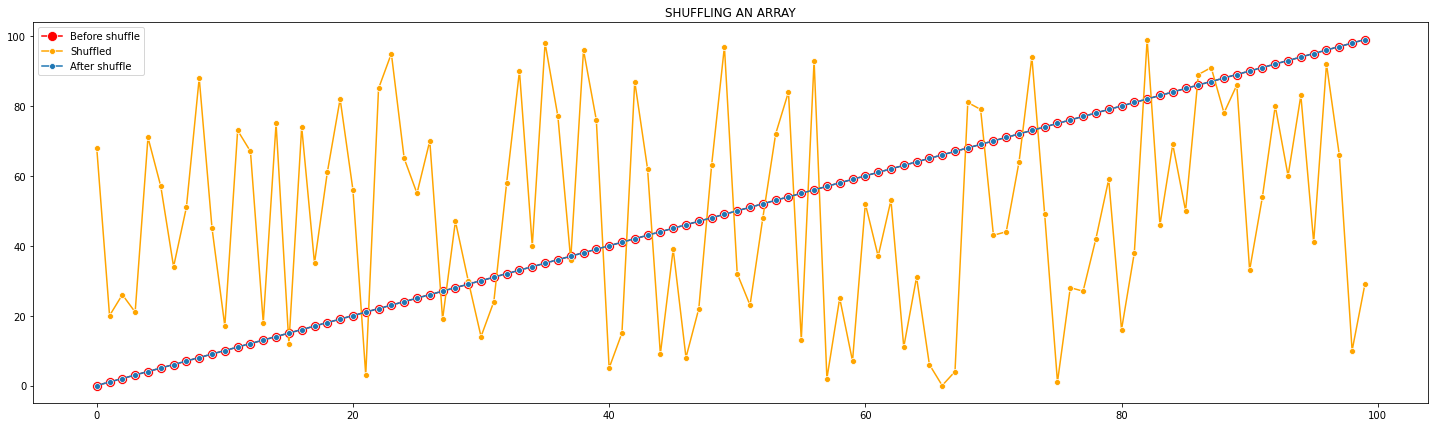

In [29]:
# Generating an array
x = np.arange(100)
print ("Array - before shuffle:\n", x, "\n")
# Plotting
fig, axs = plt.subplots(figsize = (25,7))
sns.lineplot(data = x, marker = "o", markersize=10, color = "red")

# Shuffling an array
y = (rng.permutation(x))
print ("Array - shuffled (copy):\n", y, "\n")
print ("Array - after shuffle:\n", x, "\n")
# Plotting
sns.lineplot(data = y, marker = "o", color = "orange")
sns.lineplot(data = x, marker = "o")
plt.title ("SHUFFLING AN ARRAY")
plt.legend(["Before shuffle","Shuffled","After shuffle"])
plt.show()

| |
| :-: | 
| This plot gives a visual represantation how *permutation* function shuffles an array by creating a copy, while the initial array remains the same. The red line is the array before it gets shuffled, and the orange is the copy that is generated shuffling. Blue line represents the array after the *permutation* and how it is remains same. |                                                                                  

***

PERMUTATION OF AN ARRAY [0,20)

Array - before shuffle: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Array - after shuffle: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


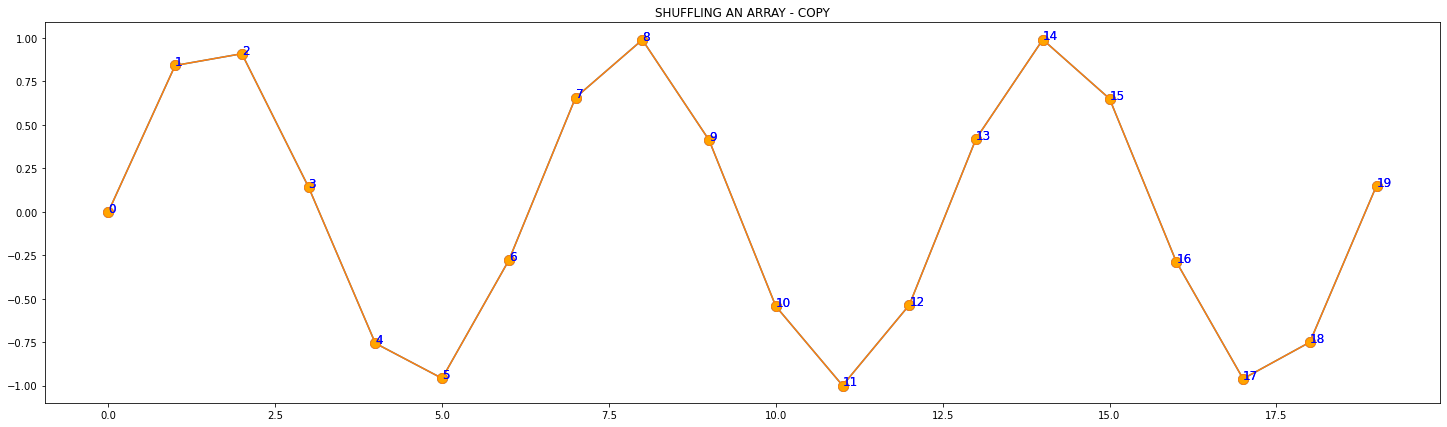

In [30]:
# Generating arrays
x = np.arange(20)
y = np.sin(x)
print("Array - before shuffle:", x)
# Plotting
fig, axs = plt.subplots(figsize = (25,7))
plt.title ("SHUFFLING AN ARRAY - COPY")
plt.plot(x, y, marker="o", markerfacecolor='orange', markersize=10)
# Adding marker values
for a, b in zip(x, y):
    plt.text(a, b, str(a), color="b", fontsize=12)

# Shuffling array x
rng.permutation(x)
print("Array - after shuffle:", x)

# Plotting
plt.plot(x, y, marker="o", markerfacecolor='orange', markersize=10)
# Adding marker values
for a, b in zip(x, y):
    plt.text(a, b, str(a), color="b", fontsize=12)   
plt.show()

|  |
| :-: | 
| The plot serves as a visual represantation of a shuffle done using *permutation* function. There are 2 lines overlapping eachother on this plot, both following the sinus curve. It is visible that inital shuffle remains the same after the shuffle, because the shuffle isn't done in place, but rather creating a copy.|                                                                                  

Initial Array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

Axis 0 shuffle:
 [[15 16 17 18 19]
 [ 5  6  7  8  9]
 [20 21 22 23 24]
 [10 11 12 13 14]
 [ 0  1  2  3  4]] 

Axis 1 shuffle:
 [[ 2  1  4  0  3]
 [ 7  6  9  5  8]
 [12 11 14 10 13]
 [17 16 19 15 18]
 [22 21 24 20 23]] 



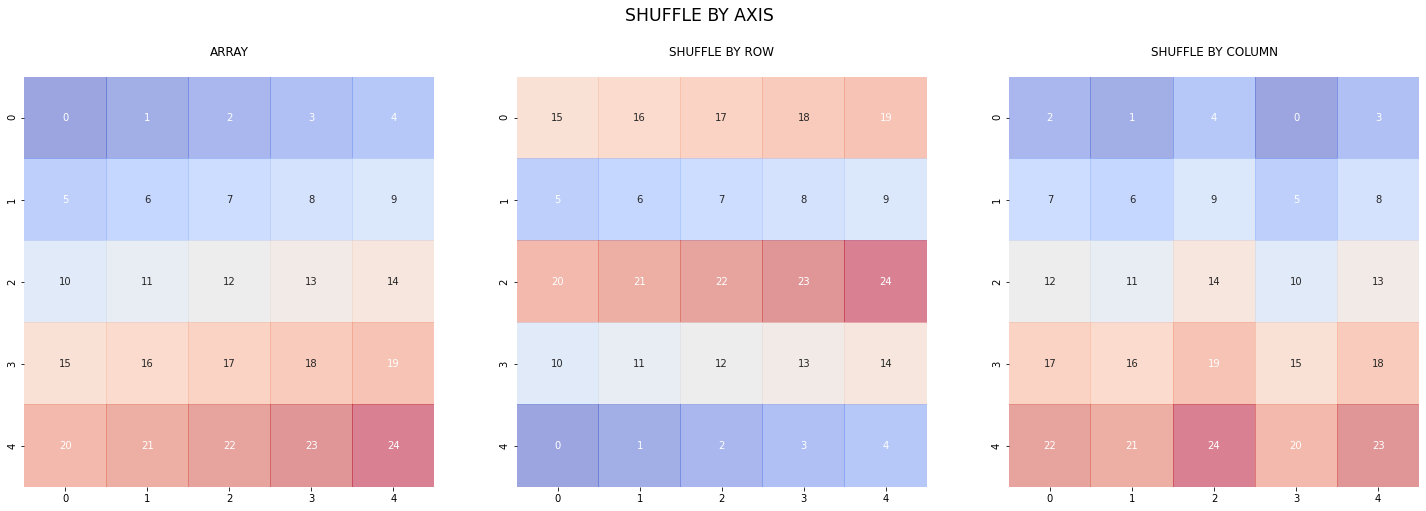

In [31]:
# Generating an array
x = np.arange(25).reshape((5, 5))
print("Initial Array:\n", x, "\n")
# Plotting
fig, axs = plt.subplots(1, 3, figsize = (25,8))
fig.suptitle ("SHUFFLE BY AXIS", size = "xx-large")
sns.heatmap (data = x, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[0], cbar=False).set_title("ARRAY\n")

# Shuffling an array by row
y = rng.permutation(x, axis = 0)
print("Axis 0 shuffle:\n", y, "\n")
# Plotting
sns.heatmap (data = y, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[1], cbar=False).set_title("SHUFFLE BY ROW\n")

# Shuffling an array by column
y = rng.permutation(x, axis = 1)
print("Axis 1 shuffle:\n", y, "\n")
# Plotting
sns.heatmap (data = y, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[2], cbar=False).set_title("SHUFFLE BY COLUMN\n")
plt.show()

|  |
| :-: | 
| The heatmaps above show the shuffle of an array by axes. It is visible how *permutation* function shuffles the contents of an array "in bulk", same as the *shuffle* function. First plot shows the inital array. Second plot shows a shuffle by axis 0 (row) and the third one a shuffle by axis 1 (column). If compared to the same heatmaps in the *shuffle* section above, it is noticable how in the *shuffle* function plot gets shuffled first time, and then that new plot gets shuffled. This is because the shuffle happens in place. With the *permutation* function the inital plot remains the same - copy is created. Therefore, the first plot is the plot that is shuffled (again) when done the second time.  |                                                                                  

***

#### 2.3.3. [**permuted**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted) (x, axis=None, out=None) <a id='permuted'></a>

Randomly permute *x* along axis where each slice along the given axis is shuffled independently of the others. ***x*** is an array to be shuffled. ***axis*** defines the axis in which slices of *x* are shuffled. Each slice is shuffled independently of the others. If *axis* is *None*, the flattened array is shuffled. ***out*** defines the destinaton of the shuffled array. If it is *None*, a shuffled copy of the array is returned.

EXAMPLES:
***

Array - before shuffle:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 

Array - shuffled (copy):
 [95 50  0 33 15 86 51 66 25 99 21 74 67 61 65 16  2 90  9 34 80 35  4 18
 82 19 32 44 77 22 26 68 11 39  6 75 98 10 46 54 24 43 48 17 13 78 87 96
  3 58 89 97 72 14 38 12 88 23  8 29 55  5 91 79 28 60 83 31 64 56 69 76
 53 81 40 30 92  1 41 71 57 49 45 59 84 94 70  7 85 93 73 47 42 63 52 37
 27 62 20 36] 

Array - after shuffle:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 



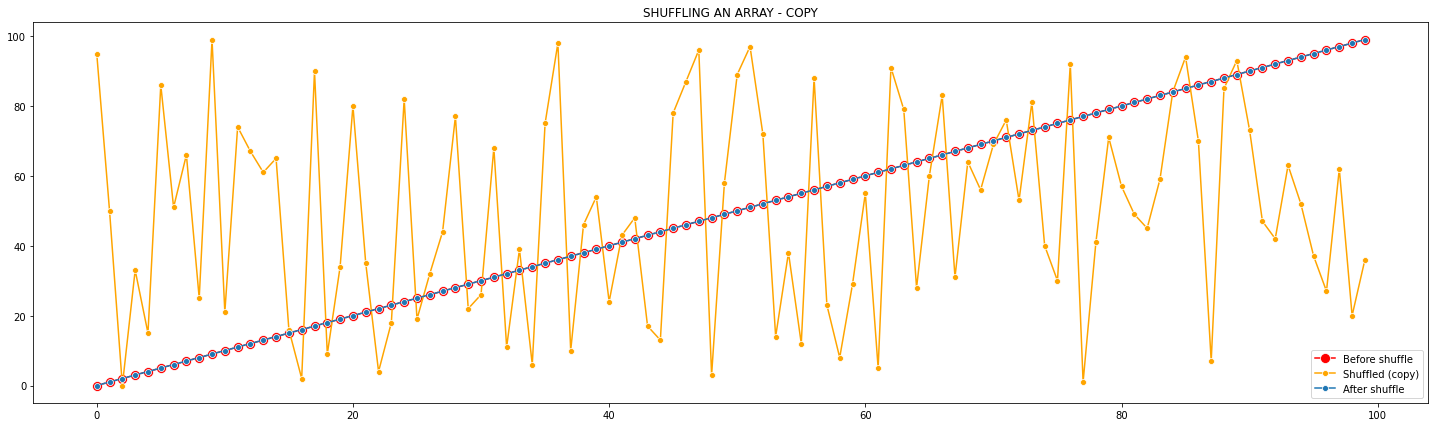

In [32]:
# Generating an array
x = np.arange(100)
print ("Array - before shuffle:\n", x, "\n")
# Plotting
fig, axs = plt.subplots(figsize = (25,7))
sns.lineplot(data = x, marker = "o", markersize=10, color = "red")

# Shuffling an array
y = (rng.permuted(x))
print ("Array - shuffled (copy):\n", y, "\n")
print ("Array - after shuffle:\n", x, "\n")
# Plotting
sns.lineplot(data = y, marker = "o", color = "orange")
sns.lineplot(data = x, marker = "o")
plt.title ("SHUFFLING AN ARRAY - COPY")
plt.legend(["Before shuffle","Shuffled (copy)","After shuffle"])
plt.show()

| |
| :-: | 
| This plot gives a visual represantation how *permuted* function shuffles an array by default - creating a copy, while the initial array remains the same. The red line is the array before it gets shuffled, and the orange is the copy that is generated shuffling. Blue line represents the array after the *permuted* function is used and how it doesn't get changed. |                                                                                  

***

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


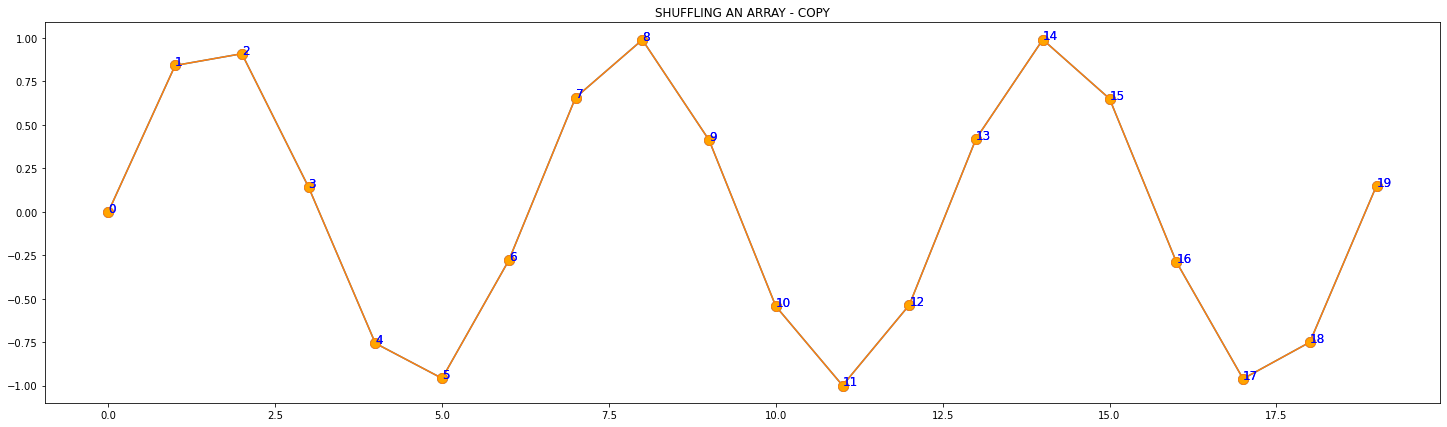

In [33]:
# Generating arrays
x = np.arange(20)
y = np.sin(x)
print(x)
# Plotting
fig, axs = plt.subplots(figsize = (25,7))
plt.title ("SHUFFLING AN ARRAY - COPY")
plt.plot(x, y, marker="o", markerfacecolor='orange', markersize=10)
# Adding marker values
for a, b in zip(x, y):
    plt.text(a, b, str(a), color="b", fontsize=12)

# Shuffling array x
rng.permuted(x)
print(x)
# Plotting
plt.plot(x, y, marker="o", markerfacecolor='orange', markersize=10)
# Adding marker values
for a, b in zip(x, y):
    plt.text(a, b, str(a), color="b", fontsize=12)
plt.show()

|  |
| :-: | 
| The plot serves as a visual represantation of a shuffle done using *permuted* function. There are 2 lines overlapping eachother on this plot, both following the sinus curve. It is visible that inital shuffle remains the same after the shuffle, because the shuffle isn't done in place, but rather creating a copy.|                                                                                  

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[18 17 12  2  8  4  7  1  6 13  0 11 15 14 19  5  3 10 16  9]


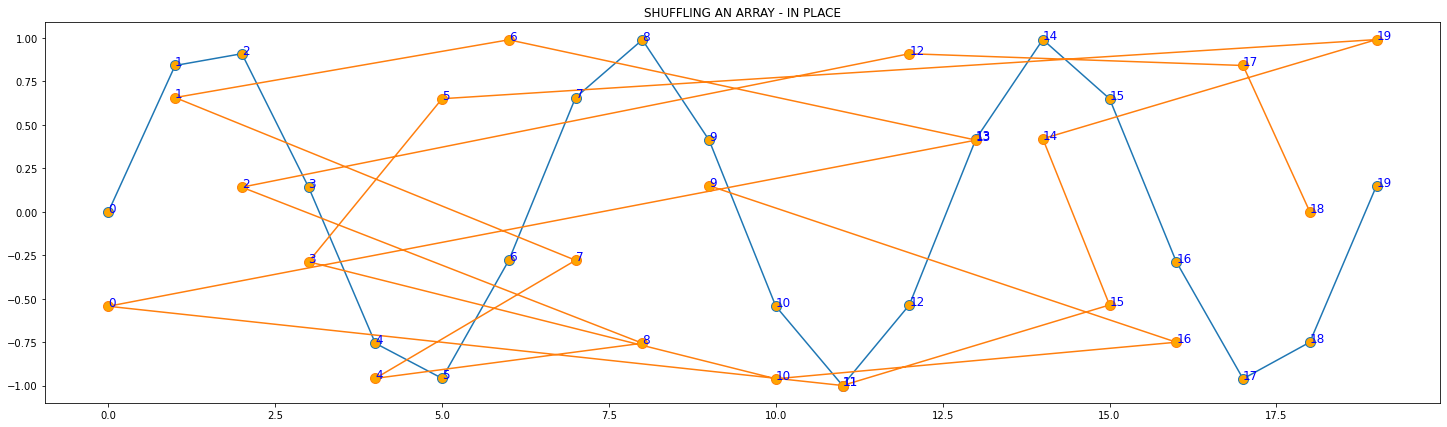

In [34]:
# Generating arrays
x = np.arange(20)
y = np.sin(x)
print(x)
# Plotting
fig, axs = plt.subplots(figsize = (25,7))
plt.title ("SHUFFLING AN ARRAY - IN PLACE")
plt.plot(x, y, marker="o", markerfacecolor='orange', markersize=10)
# Adding marker values
for a, b in zip(x, y):
    plt.text(a, b, str(a), color="b", fontsize=12)

# Shuffling array x in place    
rng.permuted(x, out=x)
print(x)
# Plotting
plt.plot(x, y, marker="o", markerfacecolor='orange', markersize=10)
# Adding marker values
for a, b in zip(x, y):
    plt.text(a, b, str(a), color="b", fontsize=12)
plt.show()

|  |
| :-: | 
| This plot also gives a visual represantation how *permuted* function shuffles an array. The difference from the previous plot is that this one has *out* set to be the *x* - shuffle in place. The blue line is the array before it gets shuffled, and the orange one after it is shuffled. The line gets drawn starting from the first number in the array. It is visible how the blue line follows the sinus curve, but it gets randomly drawn after being shuffled - orange line. |                                                                                  

Initial Array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

Shuffled array:
 [[ 9 19 20 10  5]
 [21 13 23 18 15]
 [ 4  6  7  0  3]
 [12 17 22  1  8]
 [24 14 16 11  2]] 



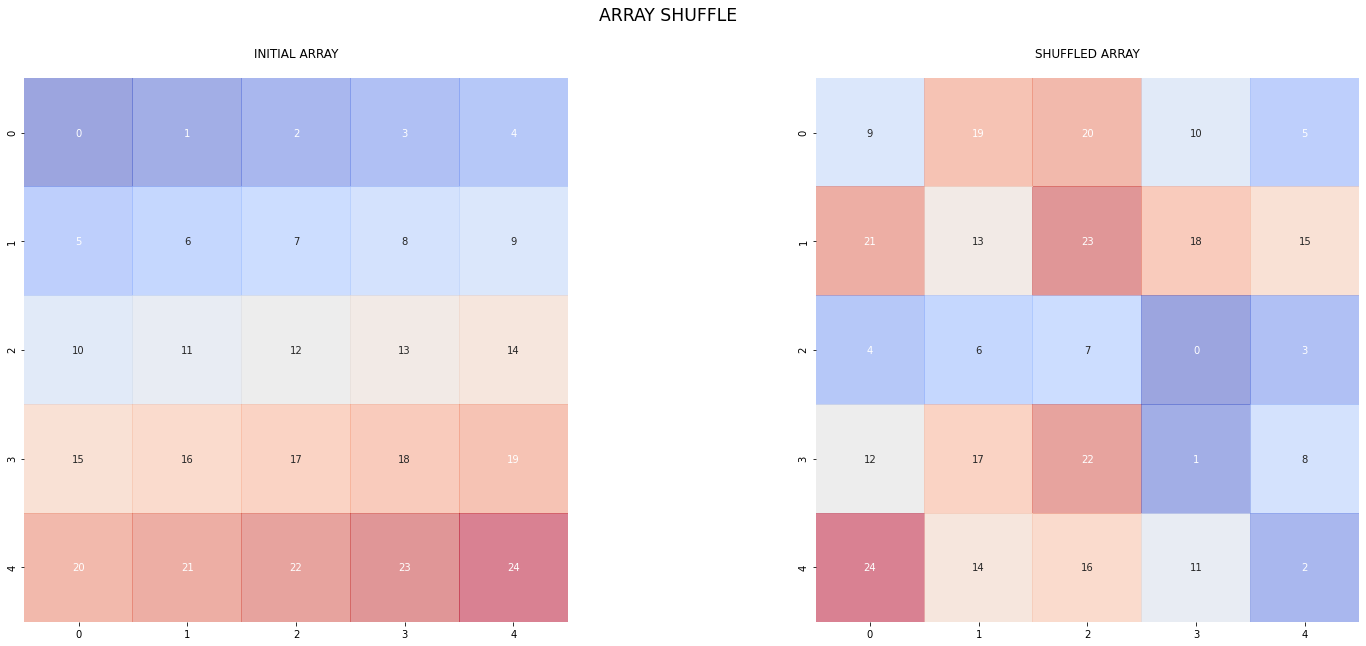

In [35]:
# Generating an array
x = np.arange(25).reshape((5, 5))
print("Initial Array:\n", x, "\n")
# Plotting
fig, axs = plt.subplots(1, 2, figsize = (26,10))
fig.suptitle ("ARRAY SHUFFLE", size = "xx-large")
sns.heatmap (data = x, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[0], cbar=False).set_title("INITIAL ARRAY\n")

# Shuffling the array
y = rng.permuted(x)
print("Shuffled array:\n", y, "\n")
# Plotting
sns.heatmap (data = y, square = True, annot = True, cmap = "coolwarm",
             alpha = 0.5, ax = axs[1], cbar=False).set_title("SHUFFLED ARRAY\n")
plt.show()

|  |
| :-: | 
| The heatmaps above show the shuffle of an array using *permuted* function. It doesn't shuffle the content "in bulk" like the other two functions, but rather independently.|                                                                                  

***

### 2.4. DISTRIBUTIONS <a id='DISTRIBUTIONS'></a>

A data distribution is a function or a listing which shows all the possible values (or intervals) of the data. It also tells you how often each value occurs. [19] There are over 20 different types of data distributions (applied to the continuous or the discrete space) commonly used in data science to model various types of phenomena. They also have many interconnections. [20] There are 5 commonly used distributions from Numpy.random package explained below.

Image 3. Distribution relationship
<center><img src="https://miro.medium.com/max/700/1*szMCjXuMDfKu6L9T9c34wg.png" width="700"/></center>

#### 2.4.1. [**uniform**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform) (low=0.0, high=1.0, size=None) <a id='uniform'></a>

A uniform distribution, sometimes also known as a rectangular distribution, is a distribution that has constant probability. [21] This means that all outcomes are equally likely to happen.
Samples are uniformly distributed over the half-open interval. ***low*** is the starting point of the interval and is included. All generated values are greater than or equal to low. The default value is 0. ***high*** is the ending point of the interval and it is excluded. All generated values are less than high. The difference between *high* and *low* (*high - low*) must be non-negative. The default value is 1.0. ***size*** defines the shape of the output.

A real life example would be rolling a fair die. The outcome to roll any number ( 1 to 6) is equally likely to happen.

***

EXAMPLES
***

[0.87905879 4.86426707 1.9575247  ... 6.50643487 0.03701091 5.34977772]


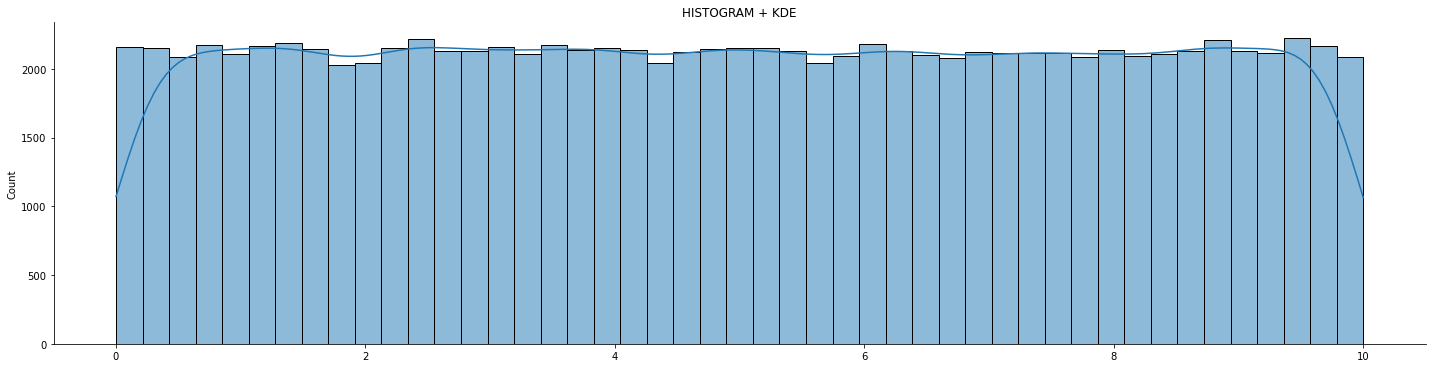

In [36]:
# Generate an array with uniformed distribution
s = np.random.default_rng().uniform(0,10, 100000)
print (s)
# Plotting
sns.displot (s, height=5, aspect=20/5, alpha = 0.5, kde = True)
plt.title("HISTOGRAM + KDE")
plt.show()

|  |
| :-: | 
| It is visible in this plot how the *uniform* function generates numbers that are uniformly distributed. All the float values are generated approx. 2000 times. |                                                                                  

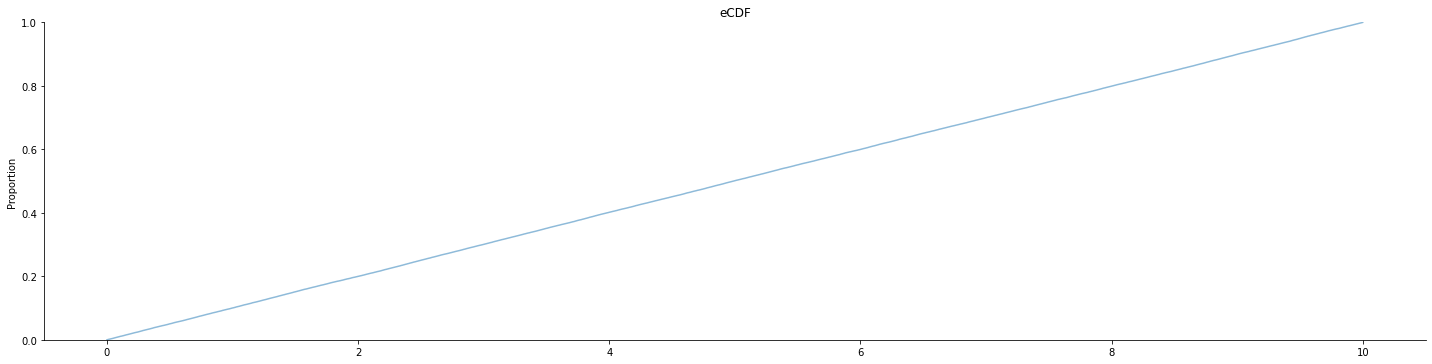

In [37]:
# Plotting
sns.displot (s, height=5, aspect=20/5, alpha = 0.5, kind = "ecdf")
plt.title("eCDF")
plt.show()

|  |
| :-: | 
| This plot shows the probibility that a certain float and the floats less that that one get generated. It is visible that the probibility rises in linear fashion. |                                                                                  

***

#### 2.4.2. [**normal**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) (loc=0.0, scale=1.0, size=None) <a id='normal'></a>

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve. [22] ***loc*** defines the mean (centre) and ***scale*** is the standard deviation (spread or width) of the distribution. ***size*** is the shape of the output.

A real life example would be a population height. Most of the people are around 170cm height and that would be a centre. There are people shorter or higher than that, but the number of those get lower as the height becomes smaller/higher. 

EXAMPLES
***

[ -9.69289535 -15.9872839    1.66567896 ...  18.38091875 -14.73733961
   2.12067401]


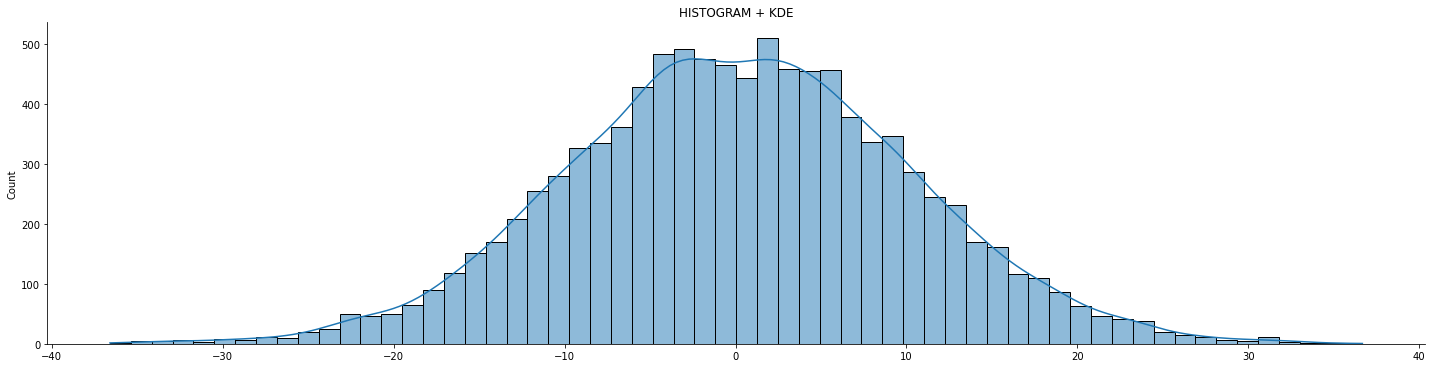

In [38]:
# Generate an array with normal distribution
s = np.random.default_rng().normal(0, 10, 10000)
print(s)
# Plotting
sns.displot (s, height=5, aspect=20/5, alpha = 0.5, kde = True)
plt.title("HISTOGRAM + KDE")
plt.show()

|  |
| :-: | 
| The plot above shows how the generated numbers occur more often around the defined *loc* (mean or center). The plot resembles a belly shape. As the value move away from the centre on either side of the plot, they get generated less. |                                                                                  

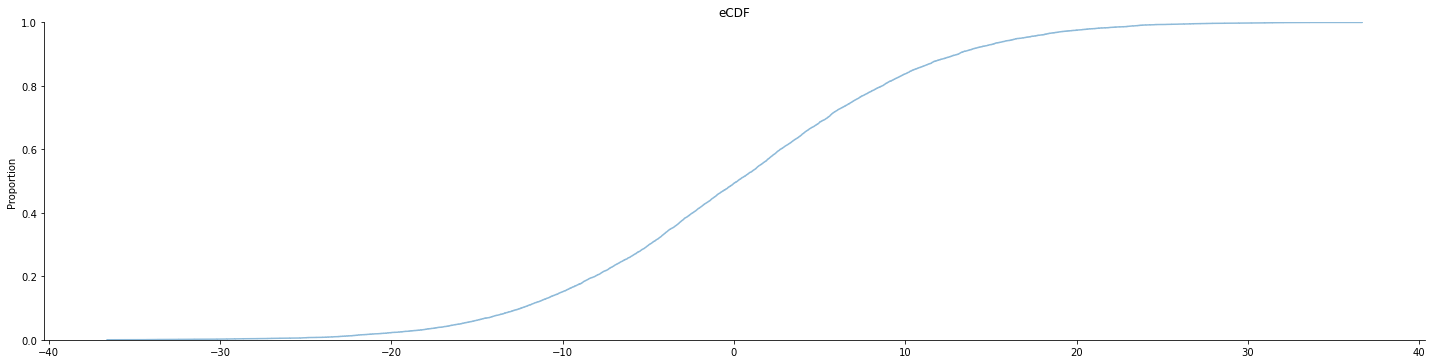

In [39]:
# Plotting
sns.displot (s, height=5, aspect=20/5, alpha = 0.5, kind = "ecdf")
plt.title("eCDF")
plt.show()

|  |
| :-: | 
| It is visible in the plot above how the probibiliy that the number gets generated "rises slowly", and increases rapidly coming closer to the centre. It then "slows down" again as it reaches the centre.|                                                                                  

***

#### 2.4.3. [**binomal**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial) (n, p, size=None) <a id='binomal'></a>

A binomial distribution can be thought of as simply the probability of a success or failure outcome in an experiment or survey that is repeated multiple times. The binomial is a type of distribution that has two possible outcomes. [23] ***n*** is an integer>= 0 that defines the number of trials. Floats are also accepted, but they get truncated to integers. ***p*** is the probability of each trial and is in range >= 0 and <=1. If multiple *p*-s are defined, the sum of all has to be 1. The output shape is defined by ***size***.

A real life example would be picking black and white marbles from a bag, but returning the picked one back into the bag. The number of marbles doesn't have to be equal, meaning that the probibility to pick certain marble could vary.

EXAMPLES
***

[399 372 371 ... 420 419 410]


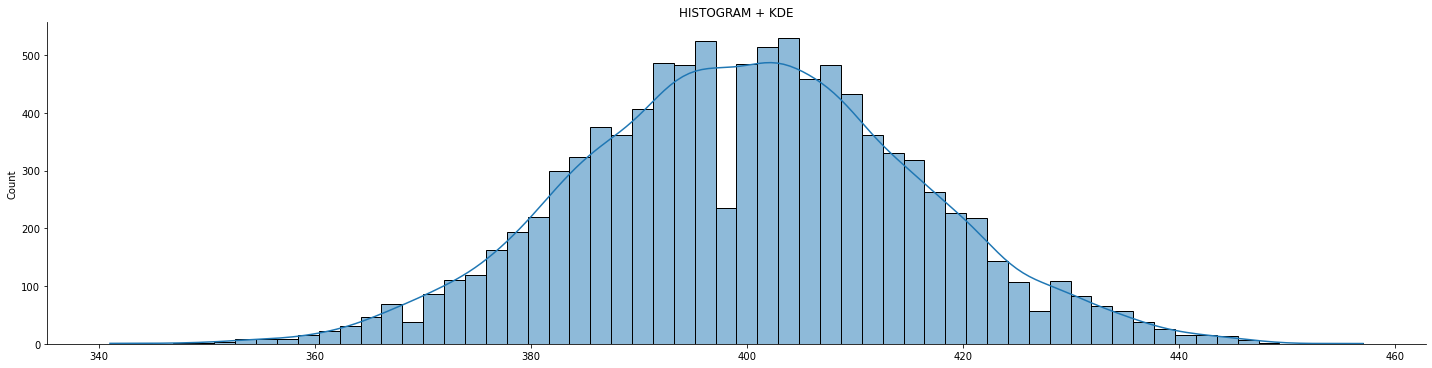

In [40]:
# Generate an array with binomal distribution
s = rng.binomial(1000, 0.4, 10000)
print (s)
# Plotting
sns.displot (s, height=5, aspect=20/5, alpha = 0.5, kde = True)
plt.title("HISTOGRAM + KDE")
plt.show()

|  |
| :-: | 
| The plot above shows the probability of success in a 1000 *n* trials if the *p* is set to *0.4*. It is visible that the number of generated numbers is the highest around 400, forming a belly curve. All the numbers generated are concentrated around 400, but the number of them declines as we move from 400. |                                                                                  

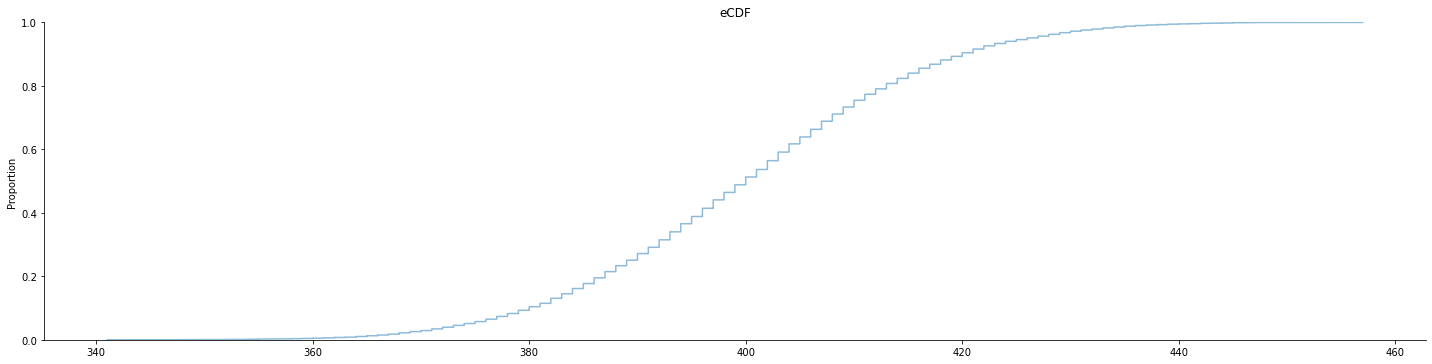

In [41]:
# Plotting
sns.displot (s, height=5, aspect=20/5, alpha = 0.5, kind = "ecdf")
plt.title("eCDF")
plt.show()

|  |
| :-: | 
| It is visible in the plot above how the probibiliy that the number gets generated "rises slowly", and increases rapidly coming closer to 400. It then "slows down" again as it reaches 400. It is visible that most number generated are around 400, there are no values less then 340 or higher then 460.|                                                                                  

***

#### 2.4.4. [**hypergeometric**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.hypergeometric.html#numpy.random.Generator.hypergeometric) (ngood, nbad, nsample, size=None) <a id='hypergeometric'></a>

Hypergeometric distribution is a distribution function in which selections are made from two groups without replacing members of the groups. The hypergeometric distribution differs from the binomial distribution in the lack of replacements. [24] ***ngood*** represents the ways to make a good selection, ***nbad*** represents ways to make a bad selection. They both can't be negative. ***nsample*** is the number of items sampled, and is less than or equal to the sum *ngood* + *nbad*. ***size*** is the output shape.

A real life example would be picking black and white marbles from a bag, but NOT returning the picked ones back into the bag.

EXAMPLES
***

Number of good selections if good and bad are equal:
 [2 4 3 5 2 5 3 5 6 4 3 7 5 3 1 5 2 3 5 5 5 4 7 5 4 8 5 5 6 8 5 5 4 6 3 3 6
 3 3 4 5 4 4 5 4 6 5 5 6 8 7 5 6 6 6 6 3 7 4 5 7 4 4 5 5 4 6 5 5 3 4 8 5 5
 6 6 6 4 6 8 4 6 7 4 4 5 6 5 5 6 4 6 5 7 3 2 3 7 4 4]
Number of good selections if good is lower then bad:
 [1 2 1 2 0 0 1 1 0 3 2 1 1 0 0 0 1 3 1 0 2 0 0 3 2 1 1 2 4 2 1 0 2 0 0 0 0
 2 0 0 0 1 1 2 0 0 3 1 2 1 0 2 0 1 0 2 3 0 1 1 0 0 1 0 3 0 1 1 0 1 0 2 0 2
 1 2 1 3 1 0 1 0 1 0 1 1 0 0 0 4 1 3 1 2 2 0 0 1 1 0]
Number of good selections if good is higher then bad:
 [ 8 10  9  9 10  9 10  9 10 10 10 10  9  9  9 10 10 10  9  9  8  8 10  9
 10  9  9 10  9  9  9  8  9  9  9  9 10  9  9  8  9  9  9  8  9 10  9 10
 10  8 10  8 10  8 10  8  9 10  9  9 10  9  8  9  8 10  6  9  8  9  9 10
  9  8  9  9 10  9  9 10  8  8 10  9  8 10  9  8 10  8  9 10 10  9 10 10
 10  9  8 10]


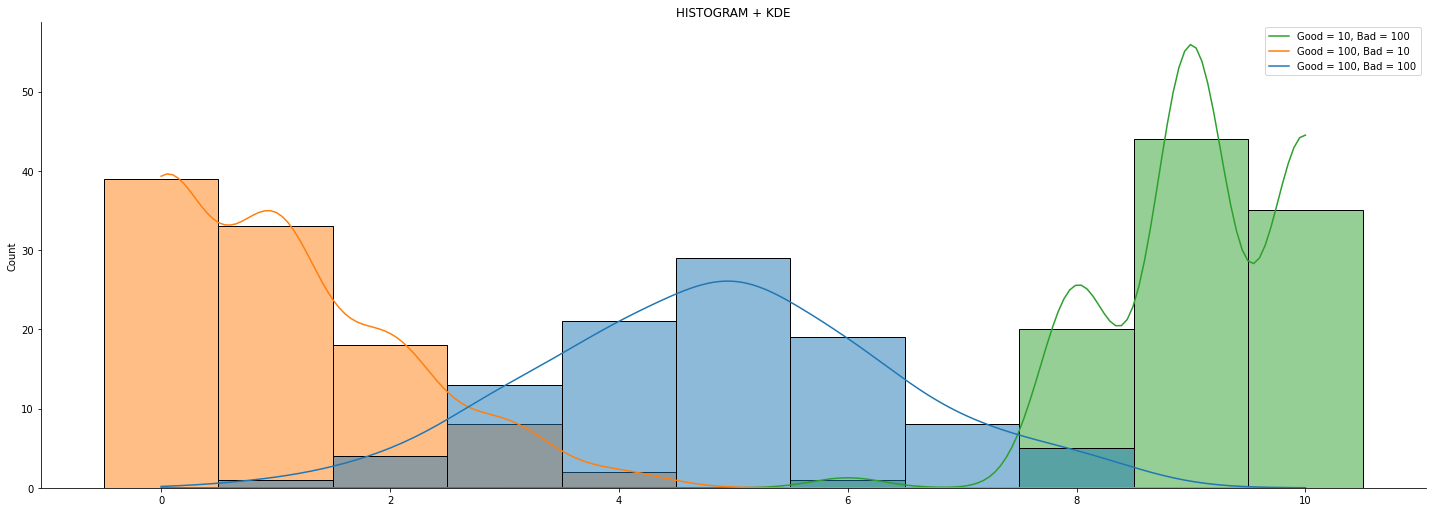

In [42]:
# Generate arrays with hypergeometric distribution
s = (rng.hypergeometric(100, 100, 10, 100))
print("Number of good selections if good and bad are equal:\n", s)
s1 = (rng.hypergeometric(10, 100, 10, 100))
print("Number of good selections if good is lower then bad:\n", s1)
s2 = (rng.hypergeometric(100, 10, 10, 100))
print("Number of good selections if good is higher then bad:\n", s2)
# Plotting
sns.displot ([s, s1, s2], height=7, aspect=20/7, alpha = 0.5, kde = True, discrete = True, legend = False)
plt.title("HISTOGRAM + KDE")
plt.legend(["Good = 10, Bad = 100", "Good = 100, Bad = 10", "Good = 100, Bad = 100"])
plt.show()

| |
| :-: | 
| Plot shows 3 different distributions with combination of *ngood* being either lower, equal or higher then *nbad*. When equal, the distribution is very similar to normal. If *ngood* is lower the probibility of good selection is lower and the number generated are lower. It is the opposite if the *ngood* is higher then *nbad*.    |                                                                                  

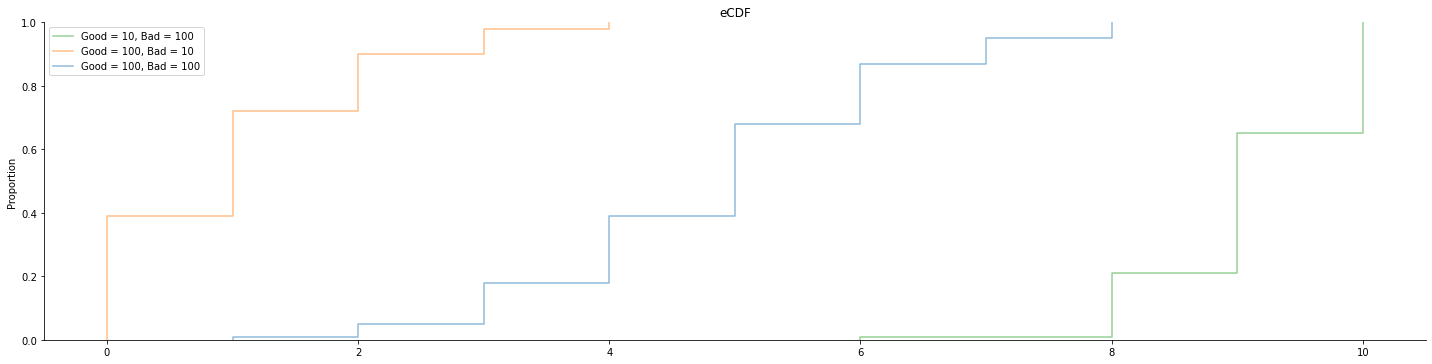

In [43]:
# Plotting
sns.displot ([s, s1, s2], height=5, aspect=20/5, alpha = 0.5, kind = "ecdf", legend = False)
plt.title("eCDF")
plt.legend(["Good = 10, Bad = 100", "Good = 100, Bad = 10", "Good = 100, Bad = 100"])
plt.show()

|  |
| :-: | 
| It is visible in the plot above how the probibiliy of a good selection "rises slowly", and increases rapidly coming closer to the centre. It then "slows down" again as it reaches the centre when *ngood* and *nbad* are equal. If *ngood* is lower then *nbad* the probability of a good selection is lower at the start and gets higher and higher. It is opposite if *ngood* is higher then *nbad*, the probability for a good selection gets lower after every selection. |                                                                                  

***

#### 2.4.5. [**poisson**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson) (lam=1.0, size=None) <a id='poisson'></a>

Poisson distribution is a probability distribution that is used to show how many times an event is likely to occur over a specified period. In other words, it is a count distribution. [25] ***lam*** (lambda) is the expected number of events occurring in a fixed-time interval and it must be >= 0. ***size*** defines the output shape. *lam* sequence must be broadcastable over the requested *size*.

Real life example would be estimating a number of car crashes in the city of certain size.

EXAMPLES
***

[9 9 9 ... 9 8 9]
[41 46 58 ... 54 32 46]
[ 89 102  97 ...  92 108 112]


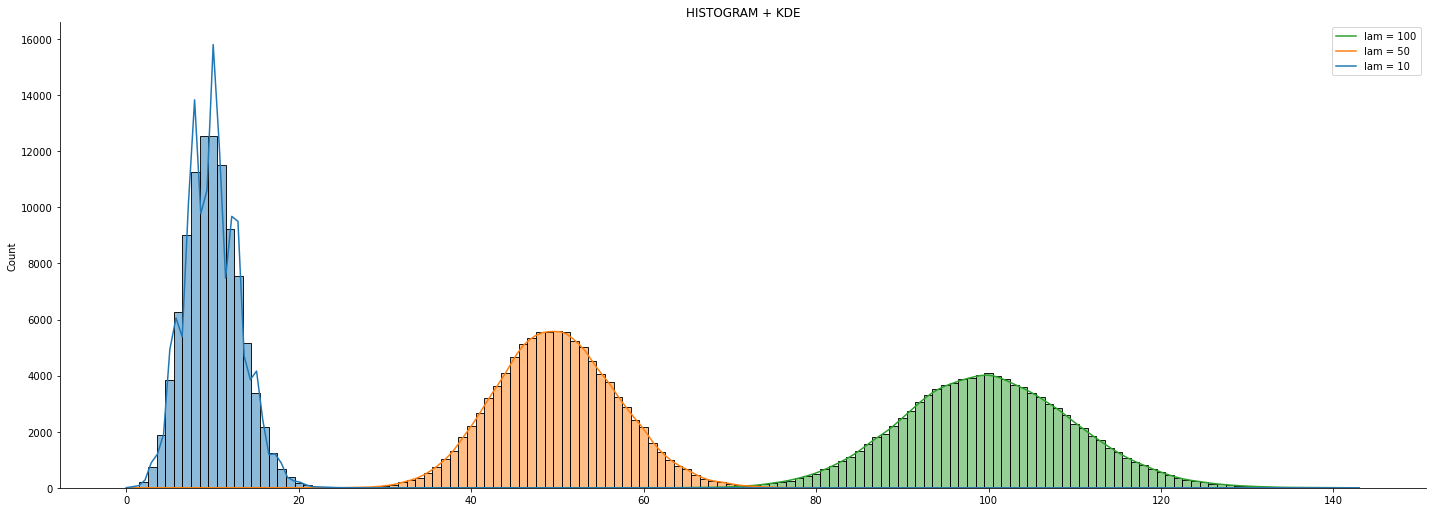

In [44]:
# Generate arrays with poisson distribution
s = (rng.poisson(10, 100000))
print (s)
s1 = (rng.poisson(50, 100000))
print (s1)
s2 = (rng.poisson(100, 100000))
print (s2)
# Plotting
sns.displot ([s, s1, s2], height=7, aspect=20/7, alpha = 0.5, kde = True, discrete = True, legend = False)
plt.title("HISTOGRAM + KDE")
plt.legend(["lam = 100", "lam = 50", "lam = 10"])
plt.show()

| |
| :-: | 
| It is visible in the plot above that the distribution of a *poisson* function has a "belly shape". Values of the output are concentrated around the defined *lam*, so the distribution is the highest at that point. It gets lower as we move on either side from the centre. |                                                                                  

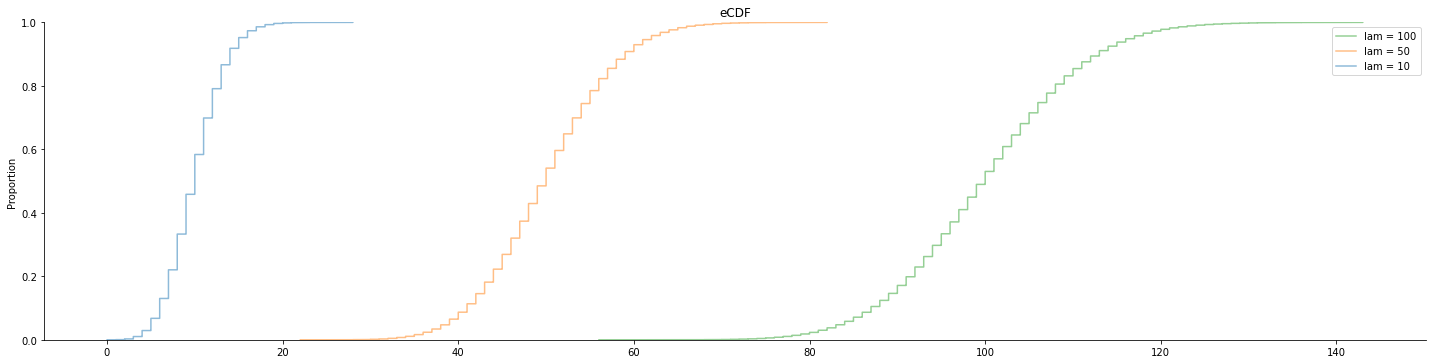

In [45]:
# Plotting
sns.displot ([s, s1, s2], height=5, aspect=20/5, alpha = 0.5, kind = "ecdf", legend = False)
plt.title("eCDF")
plt.legend(["lam = 100", "lam = 50", "lam = 10"])
plt.show()

|  |
| :-: | 
| This plot shows how the probibiliy that the event will occur "rises slowly", and increases rapidly coming closer to the centre. It then "slows down" again as it reaches the set *lam*.|                                                                                  

## 3. FOR FUN <a id='FOR_FUN'></a>
<hr style="border:2px solid gray"> </hr>

#### ROLLING A DICE
***
<left><img src="http://www.cs.unc.edu/Courses/comp101-f16/labs/lab18/dice.png" width="170"/></left> 

In [46]:
print("Your machine rolled a dice!", rng.integers(7), "is the number it rolled!")

Your machine rolled a dice! 3 is the number it rolled!


***

#### ROCK, PAPER, SCISSORS
***
<left><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSccXt-YP6KyXXBPsZoXIQqciP_ORccLiFB1LtKjud4WsV66snhFgyAvqipHIqSHsb1XVg&usqp=CAU" width="300"/></left> 

In [47]:
print ("Two machines are playing Rock, Paper, Scissors!")
possible_actions = ["rock", "paper", "scissors"]
first_machine = rng.choice(possible_actions)
second_machine = rng.choice(possible_actions)
print( "Firt machine picks: ", first_machine, "\nSecond machine picks: ", second_machine)

if first_machine == second_machine:
    print("Both machines selected", first_machine, "\nIt's a tie!")
elif first_machine == "rock":
    if second_machine == "scissors":
        print("Rock smashes scissors! First machine wins!")
    else:
        print("Paper covers rock! Second machine wins.")
elif first_machine == "paper":
    if second_machine == "rock":
        print("Paper covers rock! First machine wins!")
    else:
        print("Scissors cuts paper! Second machine wins.")
elif first_machine == "scissors":
    if second_machine == "paper":
        print("Scissors cuts paper! First machine wins!")
    else:
        print("Rock smashes scissors! Second machine wins.")

Two machines are playing Rock, Paper, Scissors!
Firt machine picks:  paper 
Second machine picks:  paper
Both machines selected paper 
It's a tie!


***

#### PLOT ART
***

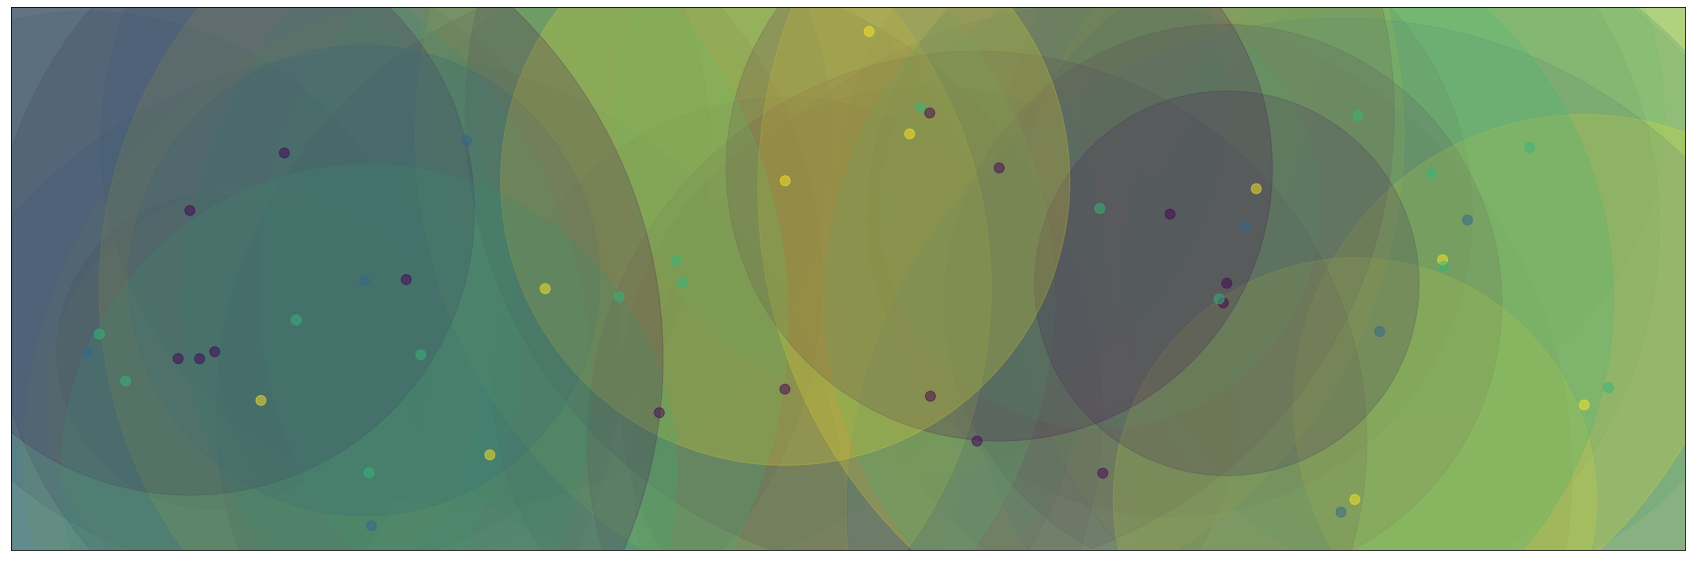

In [48]:
no_of_balls = 50
a = [rng.random() for i in range(no_of_balls)]
b = [np.random.default_rng().normal(0.5, 0.25) for i in range(no_of_balls)]
colors = [rng.integers(1, 5) for i in range(no_of_balls)]
areas = [rng.integers(1000000) for i in range(no_of_balls)]

plt.scatter(a, b, s=areas, c=colors, alpha=0.2)
plt.scatter (a,b, c=colors, alpha = 0.5, s = 100)
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
fig.set_size_inches(30, 10)
plt.show()

***

## 4. REFERENCES <a id='REFERENCES'></a>
<hr style="border:2px solid gray"> </hr>

### MAIN

- [1] https://towardsdatascience.com/getting-started-with-numpy-59b22df56729
- [2] https://python.plainenglish.io/what-are-basics-of-numpy-2afa9a9455cb
- [3] https://www.w3schools.com/python/numpy/numpy_intro.asp
- [4] https://en.wikipedia.org/wiki/Matplotlib
- [5] https://www.section.io/engineering-education/seaborn-tutorial/
- [6] https://www.javatpoint.com/numpy-random
- [7] https://www.w3schools.com/python/numpy/numpy_random.asp
- [8] https://pythonguides.com/python-numpy-random/
- [9] https://en.wikipedia.org/wiki/Random_seed
- [10] https://www.researchgate.net/post/Can-someone-explain-what-is-seed-in-generating-a-random-number
- [11] https://www.computerhope.com/jargon/s/seed.htm
- [12] https://numpy.org/doc/stable/reference/random/index.html
- [13] https://en.wikipedia.org/wiki/Mersenne_Twister
- [14] https://hackage.haskell.org/package/pcg-random
- [15] https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html
- [16] https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/
- [17] https://numpy.org/doc/stable/reference/random/generator
- [18] https://www.geeksforgeeks.org/subarraysubstring-vs-subsequence-and-programs-to-generate-them/
- [19] https://www.statisticshowto.com/data-distribution/
- [20] https://www.kdnuggets.com/2020/06/overview-data-distributions.html
- [21] https://mathworld.wolfram.com/UniformDistribution.html
- [22] https://www.investopedia.com/terms/n/normaldistribution.asp
- [23] https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/
- [24] https://www.britannica.com/topic/hypergeometric-distribution
- [25] https://www.investopedia.com/terms/p/poisson-distribution.asp





### IMAGES
- NumPy Logo - https://upload.wikimedia.org/wikipedia/commons/3/31/NumPy_logo_2020.svg
- Array shape - https://i.stack.imgur.com/NWTQH.png
- Difference between PCG and MT (ss) - https://www.pcg-random.org/index.html
- Axes - https://i.stack.imgur.com/dcoE3.jpg
- Distribution relationship - https://miro.medium.com/max/700/1*szMCjXuMDfKu6L9T9c34wg.png

### OTHER

- Jupyter Markdown:
    - https://www.ibm.com/docs/en/db2-event-store/2.0.0?topic=notebooks-markdown-jupyter-cheatsheet
    - https://stackoverflow.com/questions/41375023/how-to-increase-the-width-of-the-horizontal-line-using-markdown-git-hub
- 3D Interactive Plotting - https://www.geeksforgeeks.org/make-3d-interactive-matplotlib-plot-in-jupyter-notebook/
- sin plot: 
    - https://stackoverflow.com/questions/51000491/plot-shuffled-array-numpy
    - https://stackoverflow.com/questions/19633336/using-numbers-as-matplotlib-plot-markers
- Remove ticks in plot - https://stackoverflow.com/questions/37039685/hide-tick-label-values-but-keep-axis-labels